<a href="https://colab.research.google.com/github/Baljeet942000/Mobile_price_range_prediction/blob/main/Mobile_price_range_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   **Project Name :- Mobile price range prediction**


### **Project Type** - Classification

### **Contribution**- Individual

### **Project Description** ###

* In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.

* The aim of this project is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price.
* In this problem, we do not have to predict the actual price but a price range indicating how high the price is.
* The data set used contains 21 columns and 2000 rows.
* We will use python libraries such as pandas,seaborn,numpy and sklearn to develop our prediction algorithm.By testing and evaluating different models,we will determine which algorithms provides the most accurate predictions and can be deployed effectively in real world scenarios.

### **Attribute Information**

* **Battery_power** : Battery capacity in mAh
* **Blue** : Has bluetooth or not
* **Clock_speed** : speed at which microprocessor executes instructions
* **Dual_sim** : Has dual sim support or not
* **Fc** : Front Camera megapixels
* **Four_g** : Has 4G or not
* **Int_memory** : Internal memory capacity
* **M_dep** : Mobile depth in cm
* **Mobile_wt** : Weight of mobile phones
* **N_cores** : Number of cores in processor
* **Pc** : Primary camera megapixels
* **Px_height** : Pixel resolution height
* **Px_width** : Pixel resolution width
* **Ram** : Random Access Memory in MB
* **Sc_h** : Screen height
* **Sc_w** : Screen width
* **Talk_time** : Longest that a single battery can last over a call
* **Three_g** : Has 3g or not
* **Wifi** : Has wifi or not
* **touch_screen** : Touch screen display or not
* **Price_range** : This is the target variable with a value of 0(low cost), 1
  (medium cost), 2(high cost), 3(very high cost)


###Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


### Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Data_path = '/content/drive/MyDrive/data_mobile_price_range.csv'
df = pd.read_csv(Data_path, encoding="unicode_escape")

### Data information

**How big is the dataset ?**

In [ ]:
# The dataset has 2000 rows and 21 coloumns.
df.shape

(2000, 21)

In [ ]:
# Visualising first five rows of the dataset.
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


**Name of all the columns**

In [ ]:
df.columns


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

**Statistical description of dataset**

In [ ]:
# Statistical description of our dataset.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:
# One point worth noticing here is that we have phones with zero front and back camera megapixels,also zero pixel_height.
# We have phones with zero screen width.
# These are some abnormal entries in our dataset we will handle them while doing data pre_processing.

**Checking null values**

In [ ]:
# Determine the number of missing values for every column.
# Good to see that our dataset has no missing values.
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
# Now we will look at data info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**Checking unique values for each variable**

In [ ]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

### Data Preprocessing

In [ ]:
# It does not make any sense for a phone to have a zero screen width and zero pixel height.
# So we need to check for and handle such cases in our dataset to make the analysis more effective.

# Counting number of phones with zero screen width.
sc_w_zero_count = sum(df['sc_w']==0)
print(f'Number of phones with screen width zero : {sc_w_zero_count}')

# Counting number of phones with pixel height zero.
px_height_zero_count = sum(df['px_height']==0)
print(f'Number of phones with pixel height zero : {px_height_zero_count}')

# Counting number of phones with zero front camera megapixels.
fc_pixels = sum(df['fc']==0)
print(f'Number of phones with zero front camera mega_pixels : {fc_pixels}')

# Counting number of phones with zero back camera megapixels.
pc_pixels = sum(df['pc']==0)
print(f'Number of phones with zero back camera mega_pixels : {pc_pixels}')



Number of phones with screen width zero : 180
Number of phones with pixel height zero : 2
Number of phones with zero front camera mega_pixels : 474
Number of phones with zero back camera mega_pixels : 101


In [ ]:
# Replacing zero with mean values.

sc_w_mean = df.sc_w.mean()
px_height_mean = df.px_height.mean()
fc_pixels_mean = df.fc.mean()
pc_pixels_mean = df.pc.mean()

df.sc_w = np.where(df.sc_w ==0,sc_w_mean,df.sc_w)
df.px_height = np.where(df.px_height==0,px_height_mean,df.px_height)
df.fc = np.where(df.fc==0,fc_pixels_mean,df.fc)
df.pc = np.where(df.pc==0,pc_pixels_mean,df.pc)






In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.518500,439.418206,501.0,851.75,1226.0000,1615.25,1998.0
blue,2000.0,0.495000,0.500100,0.0,0.00,0.0000,1.00,1.0
clock_speed,2000.0,1.522250,0.816004,0.5,0.70,1.5000,2.20,3.0
dual_sim,2000.0,0.509500,0.500035,0.0,0.00,1.0000,1.00,1.0
fc,2000.0,5.330851,3.660702,1.0,3.00,4.3095,7.00,19.0
four_g,2000.0,0.521500,0.499662,0.0,0.00,1.0000,1.00,1.0
int_memory,2000.0,32.046500,18.145715,2.0,16.00,32.0000,48.00,64.0
m_dep,2000.0,0.501750,0.288416,0.1,0.20,0.5000,0.80,1.0
mobile_wt,2000.0,140.249000,35.399655,80.0,109.00,141.0000,170.00,200.0
n_cores,2000.0,4.520500,2.287837,1.0,3.00,4.0000,7.00,8.0


## Exploratory Data Analysis

### 1. Ram vs price_range

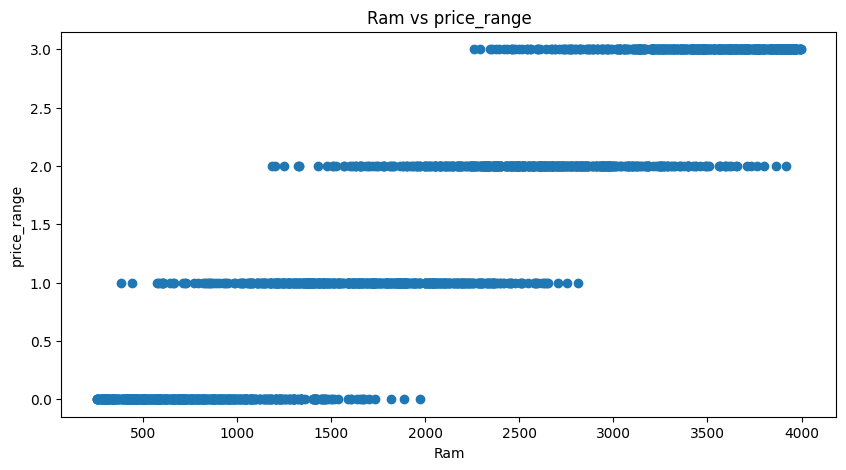

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.scatter(df['ram'],df['price_range'])
plt.xlabel('Ram')
plt.ylabel('price_range')
plt.title('Ram vs price_range')
plt.show()



*   The above plot indicates that more the Ram higher will be the price range of the phone.

*   Phones in the third category have largest RAM.
*   The processor and RAM have an impact on the performance and speed of the phone.


*   Customers generally prefer phones with better RAM and processing speed.



### 2. Battery_power vs price_range

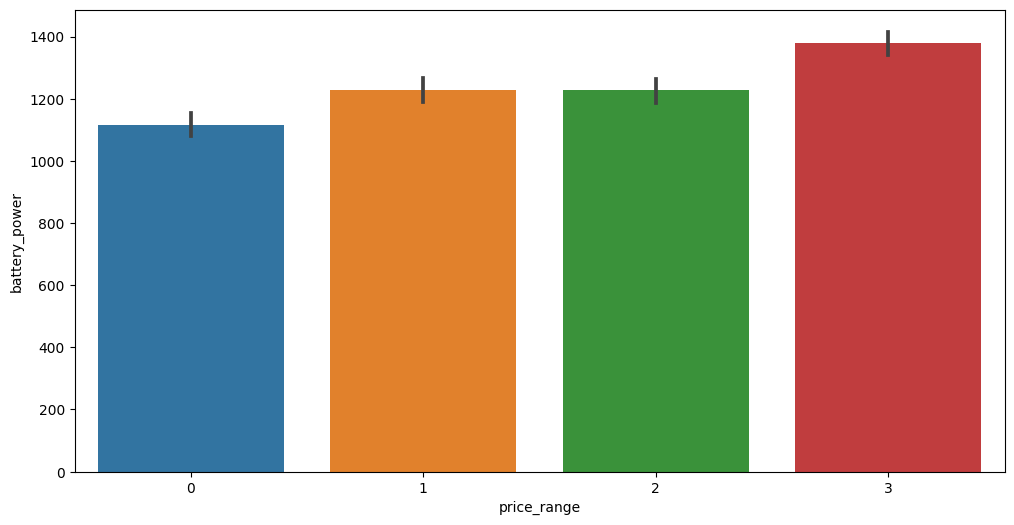

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'price_range', y = 'battery_power',data=df)
plt.show()



*   Phones with higher battery power have higher price range.

*   Phones in the third category have the highest battery power.

*   This suggests that there is a strong relationship between phone's price and battery power.
*   Consumers will be willing to pay more for a phone with higher battery power.


*   If a mobile phone manufacturer is able to produce phones with higher battery capacity at a reasonable cost they may be able to attract more customers and generate more revenue.


*   Companies can use this insight to highlight the battery capacity of there phones as a key selling point to attract potential customers.



### 3. Price range visualisation

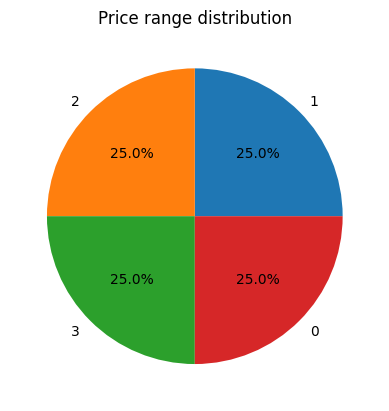

In [ ]:
price_counts = df['price_range'].value_counts()
plt.pie(price_counts,labels=price_counts.index,autopct='%1.1f%%')
plt.title('Price range distribution')
plt.show()



*   All the category phones are equally distributed.




### 4. Price range vs Pixel height/width

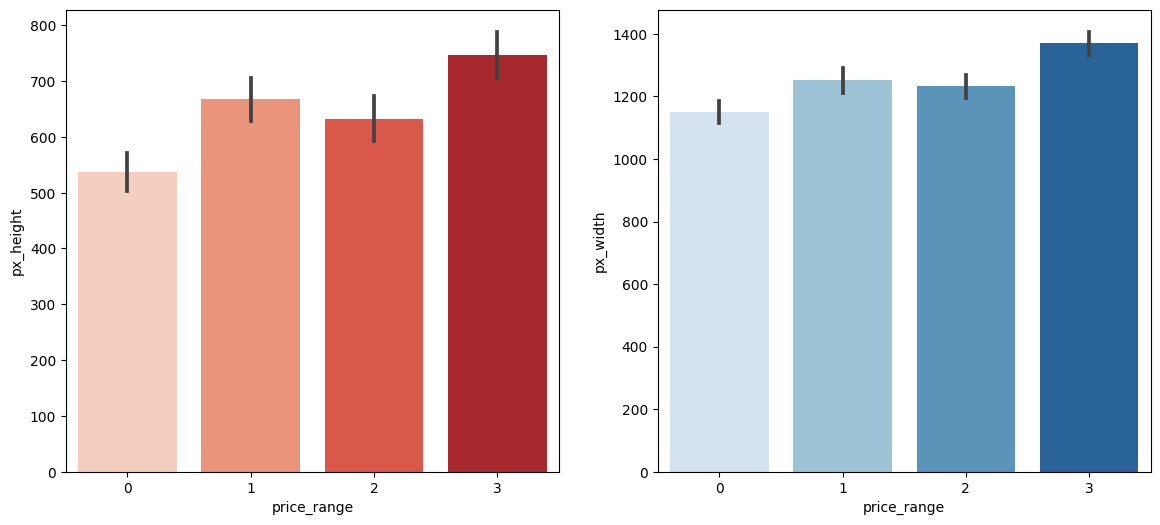

In [ ]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.barplot(x='price_range',y='px_height',data=df,palette='Reds')
plt.subplot(1,2,2)
sns.barplot(x='price_range',y='px_width',data=df,palette='Blues')
plt.show()



*   Phones with higher px_height and px_width are bit more pricey.
*   Phones belonging to the third category are having highest px_height and px_width.



### 5. Number of devices having bluetooth

In [ ]:
# Number of device with and without bluetooth.
Blue = df.groupby('blue')['blue'].count()
Blue


blue
0    1010
1     990
Name: blue, dtype: int64

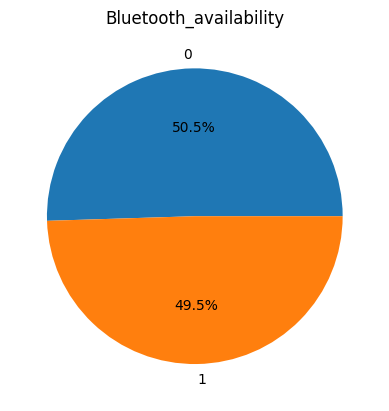

In [ ]:
plt.pie(Blue,labels=Blue.index,autopct='%1.1f%%')
plt.title('Bluetooth_availability')
plt.show()



*   Almost half the devices are having bluetooth.




### 6. Bluetooth vs price

<Axes: xlabel='blue', ylabel='price_range'>

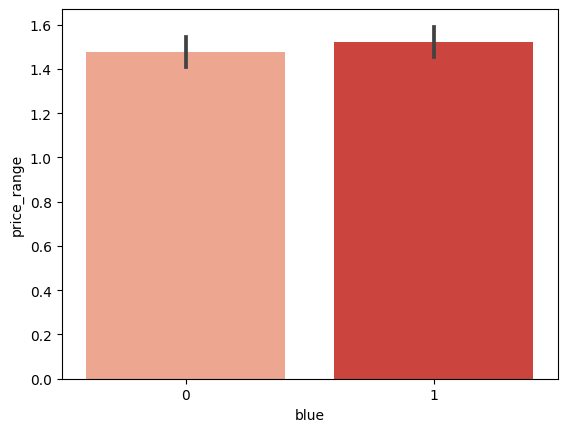

In [ ]:
sns.barplot(x='blue',y='price_range',data=df,palette='Reds')

In [ ]:
# Mean price of the devices with and without bluetooth.
df.groupby('blue')['price_range'].agg('mean')

blue
0    1.477228
1    1.523232
Name: price_range, dtype: float64



*   Phones with bluetooth are more costly.

*   Bluetooth is a wireless technology that allows devices to communicate with each other within a short range.

*   Customers who are familiar with bluetooth are more likely to prefer or buy electronic products with bluetooth.
*   A mobile phone manufacturer could use this insight to understand that customers value the presence of bluetooth in there devices.


*   They may prioritize investing in the development of bluetooth-related features or promoting the presence of bluetooth in their marketing efforts.




### 7. Dual_SIM vs price range

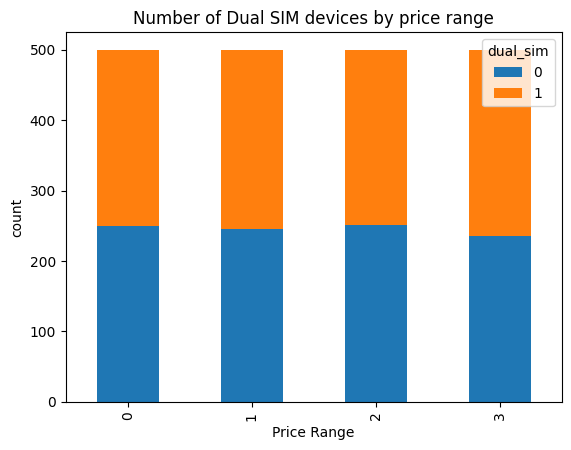

In [ ]:
# Group the data by price range and dual sim and count the number of devices in each group.
sim_count = df.groupby(['price_range','dual_sim'])['dual_sim'].count()

# Reshape the data into a dataframe with price range as rows, dual sim as columns.
sim_count = sim_count.unstack()

# Plot a bar chart of the dual sim count for each price range.
sim_count.plot(kind='bar',stacked=True)

# Add axis labels and a title.
plt.xlabel('Price Range')
plt.ylabel('count')
plt.title('Number of Dual SIM devices by price range')

# Show the plot.
plt.show()




*   We can see in the above plot that for 0(low cost), 1(medium cost), 2(high cost) price range the count of dual SIM devices is almost same.

*   But for 3(Very high cost) price range phones, number of dual SIM devices is more .

*   Having two SIM cards in one phone allows users to easily switch between different service providers or plans, without having to carry multiple devices.
*   Having a dual SIM phone is cheaper than having two separate phones for personal and business use.


*   Costumers will be willing to pay more for a dual sim device because of the cost savings and convenience.




### 8. 4G Device vs price range.

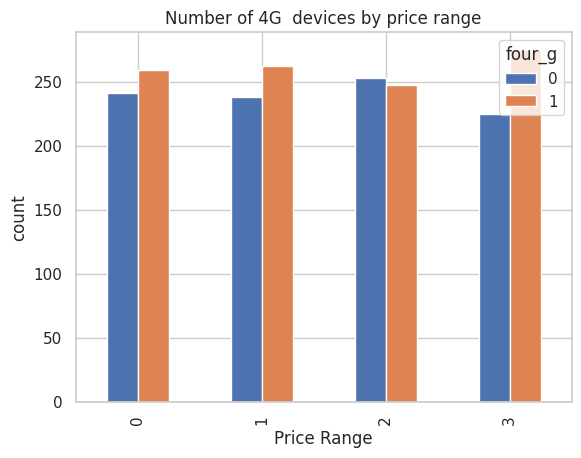

In [ ]:
# Group the data by price range and 4G sim , and count the number of devices in each group.
fourg_count = df.groupby(['price_range','four_g'])['four_g'].count()

# Reshape the data into a dataframe with price range as rows , 4G sim as coloumns.
fourg_count = fourg_count.unstack()

# Create bar charts for each price range.
fourg_count.plot(kind='bar')

# Add axis label and a title.
plt.xlabel('Price Range')
plt.ylabel('count')
plt.title('Number of 4G  devices by price range')

# Show the plot.
plt.show()








*   3(Very high cost) category has the maximum number of 4G devices.

*   Number of 4G devices in almost all the price_ranges (0,1,3) is more than the Non_4G devices.
*   Which shows that the demand of 4G devices is more in almost all the price ranges.




### 9. Pixel_width

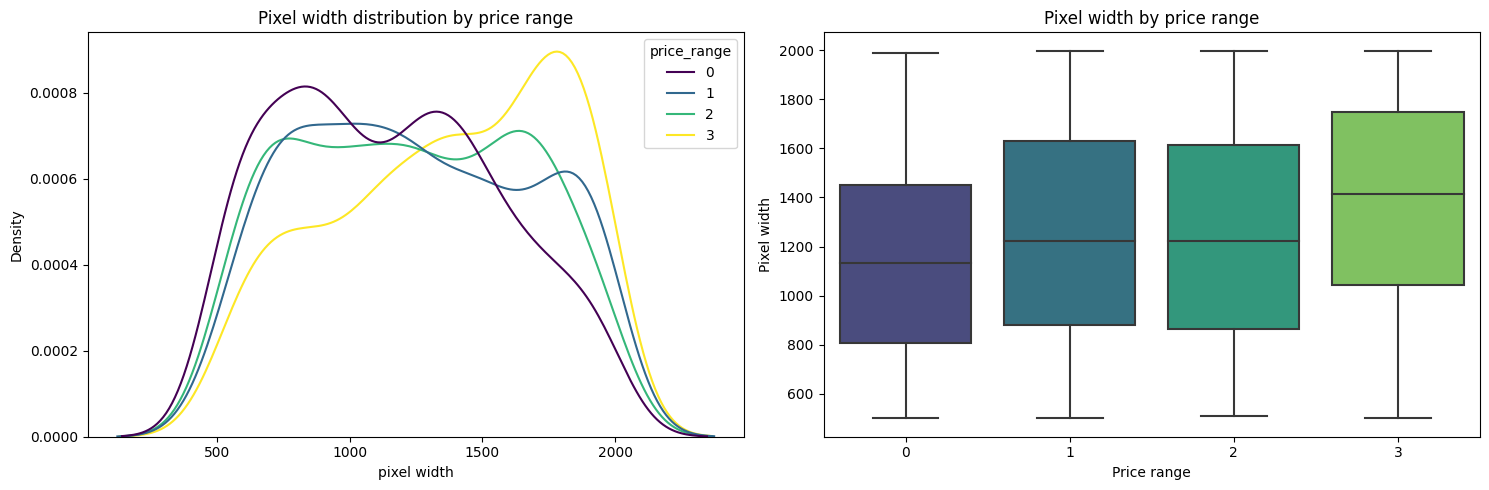

In [ ]:
# Set up the figure and axes.
fig,axs = plt.subplots(1,2, figsize=(15,5))

# Create a kernal density estimate plot for the pixel width distribution for each price range.
sns.kdeplot(data=df, x='px_width', hue='price_range', fill=False, common_norm=False,palette='viridis',ax=axs[0])
axs[0].set_xlabel('pixel width')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel width distribution by price range')

# Create a box plot of pixel width for each price range.
sns.boxplot(data=df, x='price_range', y='px_width', palette='viridis', ax=axs[1])
axs[1].set_xlabel('Price range')
axs[1].set_ylabel('Pixel width')
axs[1].set_title('Pixel width by price range')

# Adjust the layout and spacing.
plt.tight_layout()

# Show thw plot.
plt.show()



*   It can be observed that there is not a continuous increase in pixel width as we move from a low cost to very high cost mobile phones.

*   In particular mobile phones with medium cost and high cost have almost equal pixel width.
*   Indicating that pixel width cannot be the sole driving factor in deciding the price range of mobile phones.




### 10. Pixel height

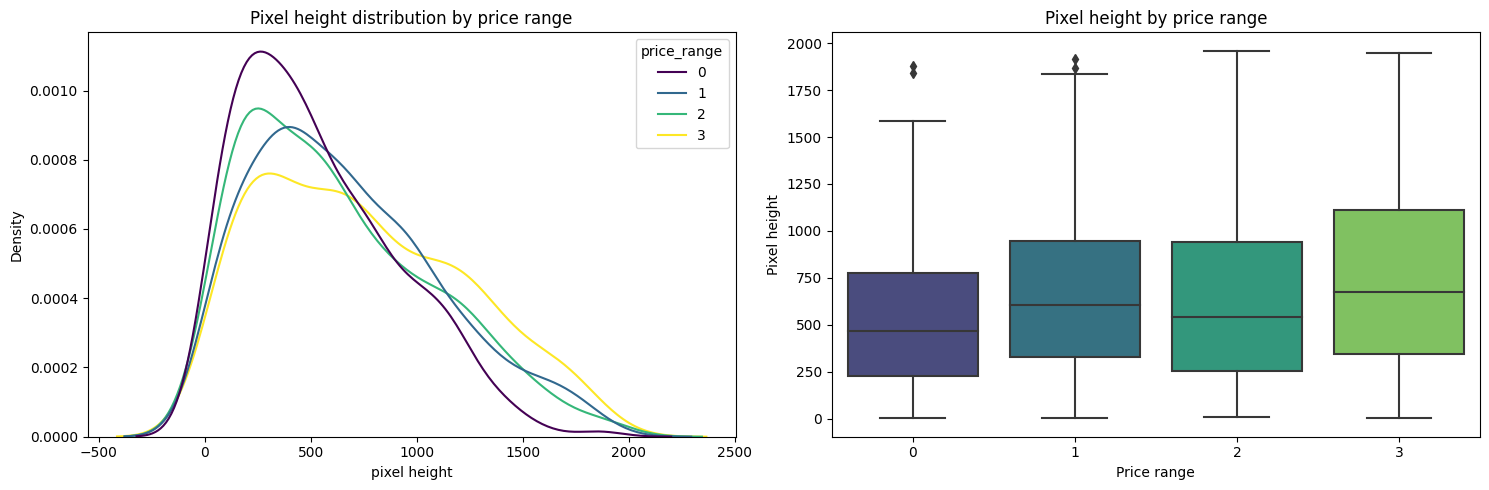

In [ ]:
# Set up the figure and axes.
fig,axs = plt.subplots(1,2, figsize=(15,5))

# Create a kernal density estimate plot for the pixel height distribution for each price range.
sns.kdeplot(data=df, x='px_height', hue='price_range', fill=False, common_norm=False,palette='viridis',ax=axs[0])
axs[0].set_xlabel('pixel height')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel height distribution by price range')

# Create a box plot of pixel height for each price range.
sns.boxplot(data=df, x='price_range', y='px_height', palette='viridis', ax=axs[1])
axs[1].set_xlabel('Price range')
axs[1].set_ylabel('Pixel height')
axs[1].set_title('Pixel height by price range')

# Adjust the layout and spacing.
plt.tight_layout()

# Show thw plot.
plt.show()



*   It can be observed that there is increase in pixel height as we move from a low cost to very high cost mobile phones.

*   Expensive mobile phones are having more pixel height.





*   The insights gained from the analysis of pixel height and width
 distribution across different price ranges can help create a positive business impact by providing usefull information to mobile phone manufacturers and marketers.
*   By understanding the relationship between the pixel height/width and price range manufacturers can optimize their product design and pricing strategies to meet the demand of the market.



### 11. Front camera megapixels

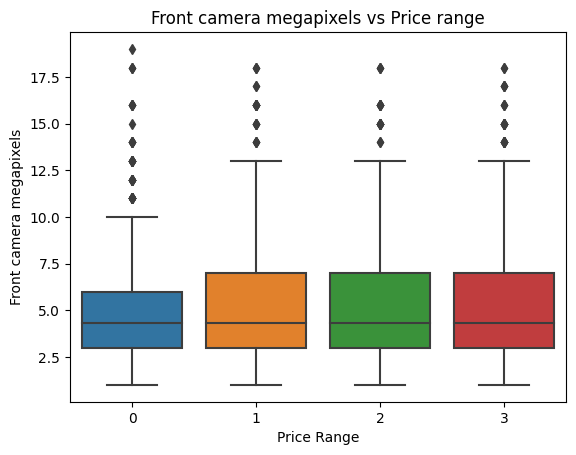

In [ ]:
# Create a box plot of front camera megapixels and price range.
sns.boxplot(x='price_range',y='fc',data=df)

# Set x and y axis label and title.
plt.xlabel('Price Range')
plt.ylabel('Front camera megapixels')
plt.title('Front camera megapixels vs Price range')

# Show the plot.
plt.show()



*   The distribution of front camera megapixels is similar across almost all the price ranges.
*   This indicates that this feature alone may not be a helpfull predictor of price range.



### 12. Primary camera megapixels.

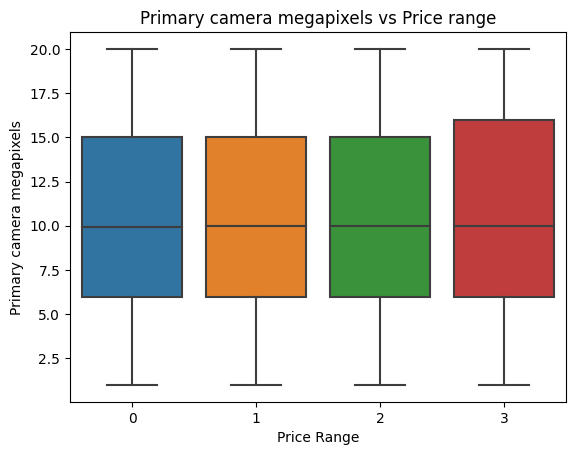

In [ ]:
# Create a box plot of primary camera megapixels and price range.
sns.boxplot(x='price_range',y='pc',data=df)

# Set x and y axis label and title.
plt.xlabel('Price Range')
plt.ylabel('Primary camera megapixels')
plt.title('Primary camera megapixels vs Price range')

# Show the plot.
plt.show()



*   The distribution of primary camera megapixels is similar across all the price ranges.
*   This indicates that this feature alone may not be a helpfull predictor of price range.



### 13. Number of cores vs price range

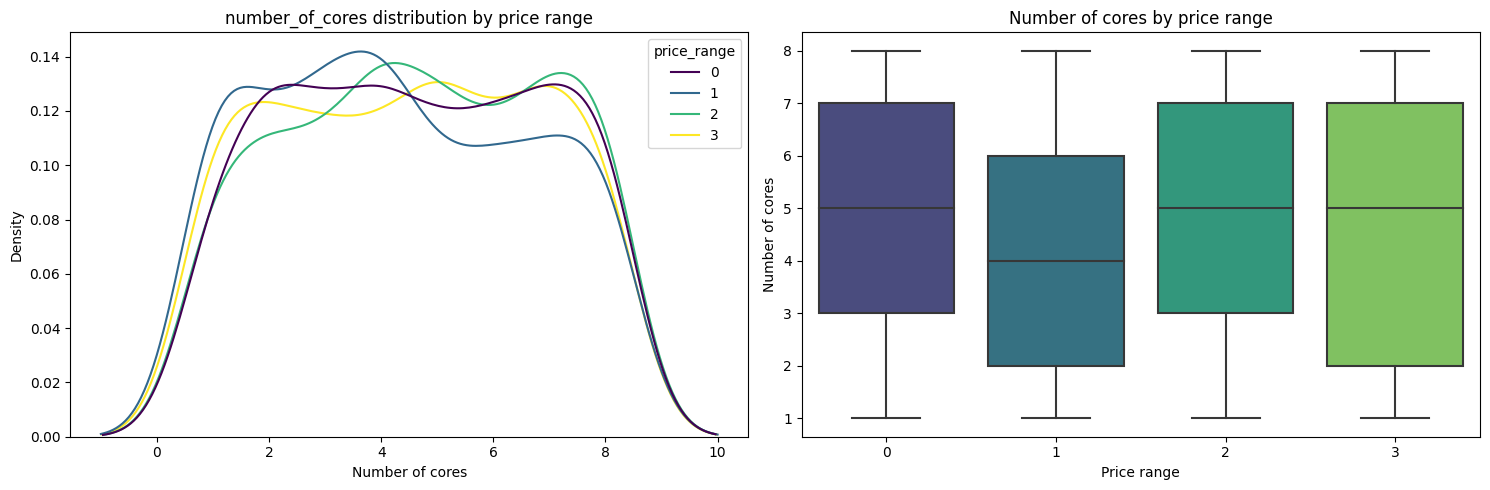

In [ ]:
# Creating a figure with two subplots side by side.
fig, axs = plt.subplots(1,2,figsize=(15,5))

# Create a kernal density estimate plot for the number_of_cores distribution for each price range.
sns.kdeplot(data=df, x='n_cores', hue='price_range', fill=False, common_norm=False,palette='viridis',ax=axs[0])
axs[0].set_xlabel('Number of cores')
axs[0].set_ylabel('Density')
axs[0].set_title('number_of_cores distribution by price range')

# Create a box plot of number_of_cores for each price range.
sns.boxplot(data=df, x='price_range', y='n_cores', palette='viridis', ax=axs[1])
axs[1].set_xlabel('Price range')
axs[1].set_ylabel('Number of cores')
axs[1].set_title('Number of cores by price range')

# Adjust the layout and spacing.
plt.tight_layout()

# Show thw plot.
plt.show()



*   The distribution of number_of_cores across different target categories is relatively consistent.
*   Indicating that this feature may not significantly influence the price range of the phone.



### 14. Mobile weight vs price range.

In [ ]:
# Grouping price range with average mobile weight.
mob_wt = pd.DataFrame(df.groupby('price_range')['mobile_wt'].agg('mean')).reset_index()
mob_wt

,price_range,mobile_wt
0,0,140.552
1,1,140.510
2,2,143.614
3,3,136.320


<Axes: xlabel='price_range', ylabel='mobile_wt'>

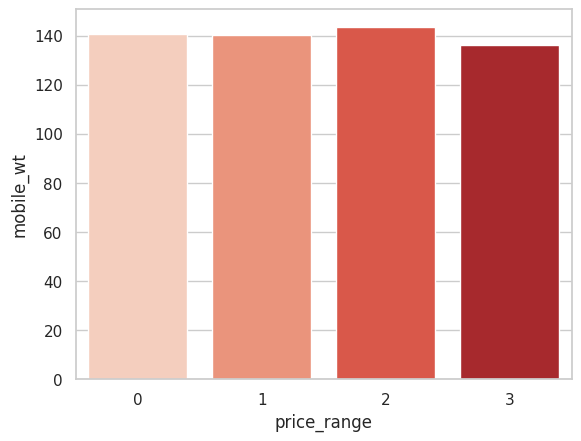

In [ ]:
# Creating a barplot.
sns.barplot(x='price_range',y='mobile_wt',data=mob_wt,palette='Reds')



*   Mobile weight across all the price range is almost same.
*   The 3(very high cost) range mobile phones are lighter.



### 15. Screen size vs price range.

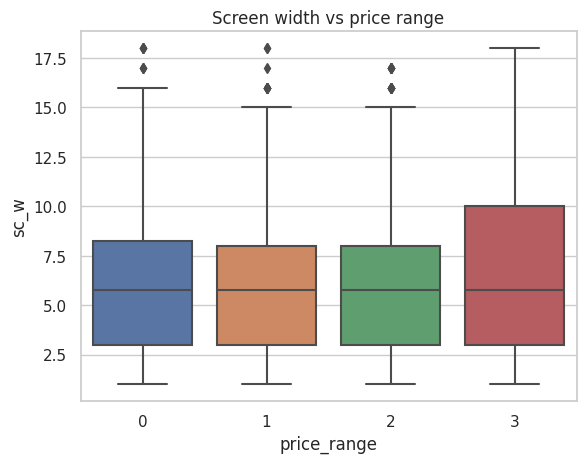

In [ ]:
# Creating boxplots.
title = 'Screen width vs price range'
sns.set(style = 'whitegrid')
sns.boxplot(x= df['price_range'] , y= df['sc_w'] , data= df)
plt.title(title)
plt.show()





*   The above plot indicates that some cheaper mobile phones can have more screen width compared to the expensive mobile phones.
*   Mobile phones in the 3(very high cost) category have the largest screen width.



### 16. 3G Mobile vs price range.

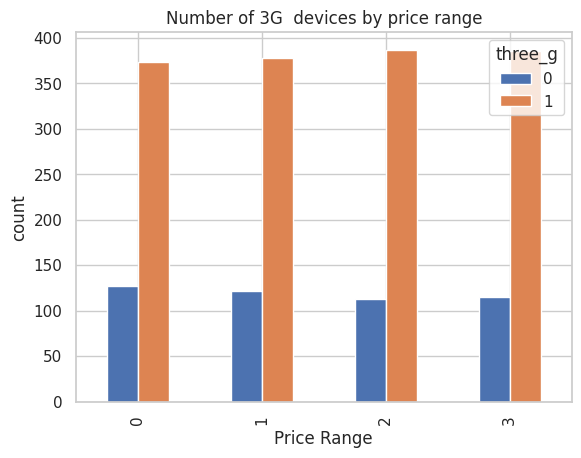

In [ ]:
# Group the data by price range and 3G sim and count the number of devices in each group.
threeg_count = df.groupby(['price_range','three_g'])['three_g'].count()

# Reshape the data into a dataframe with price range as rows , 3G sim as coloumns.
threeg_count = threeg_count.unstack()

# Create bar charts for each price range.
threeg_count.plot(kind='bar')

# Add axis label and a title.
plt.xlabel('Price Range')
plt.ylabel('count')
plt.title('Number of 3G  devices by price range')

# Show the plot.
plt.show()





*   Number of 3G devices in all the price categories is more than the Non_3G devices.


*   Number of Non_3G devices decreases as the price increases.





### 17. WiFi availability.

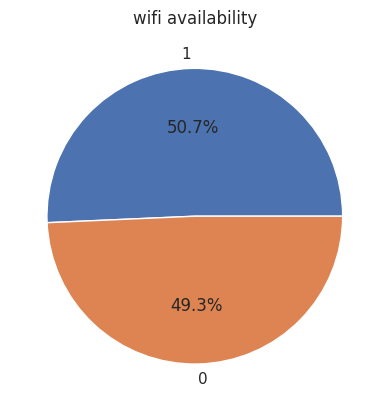

In [ ]:
wifi_counts = df['wifi'].value_counts()
plt.pie(wifi_counts,labels=wifi_counts.index,autopct='%1.1f%%')
plt.title('wifi availability')
plt.show()



*   Half of the devices have wifi .




### 18. Making Boxplots for outlier detection.

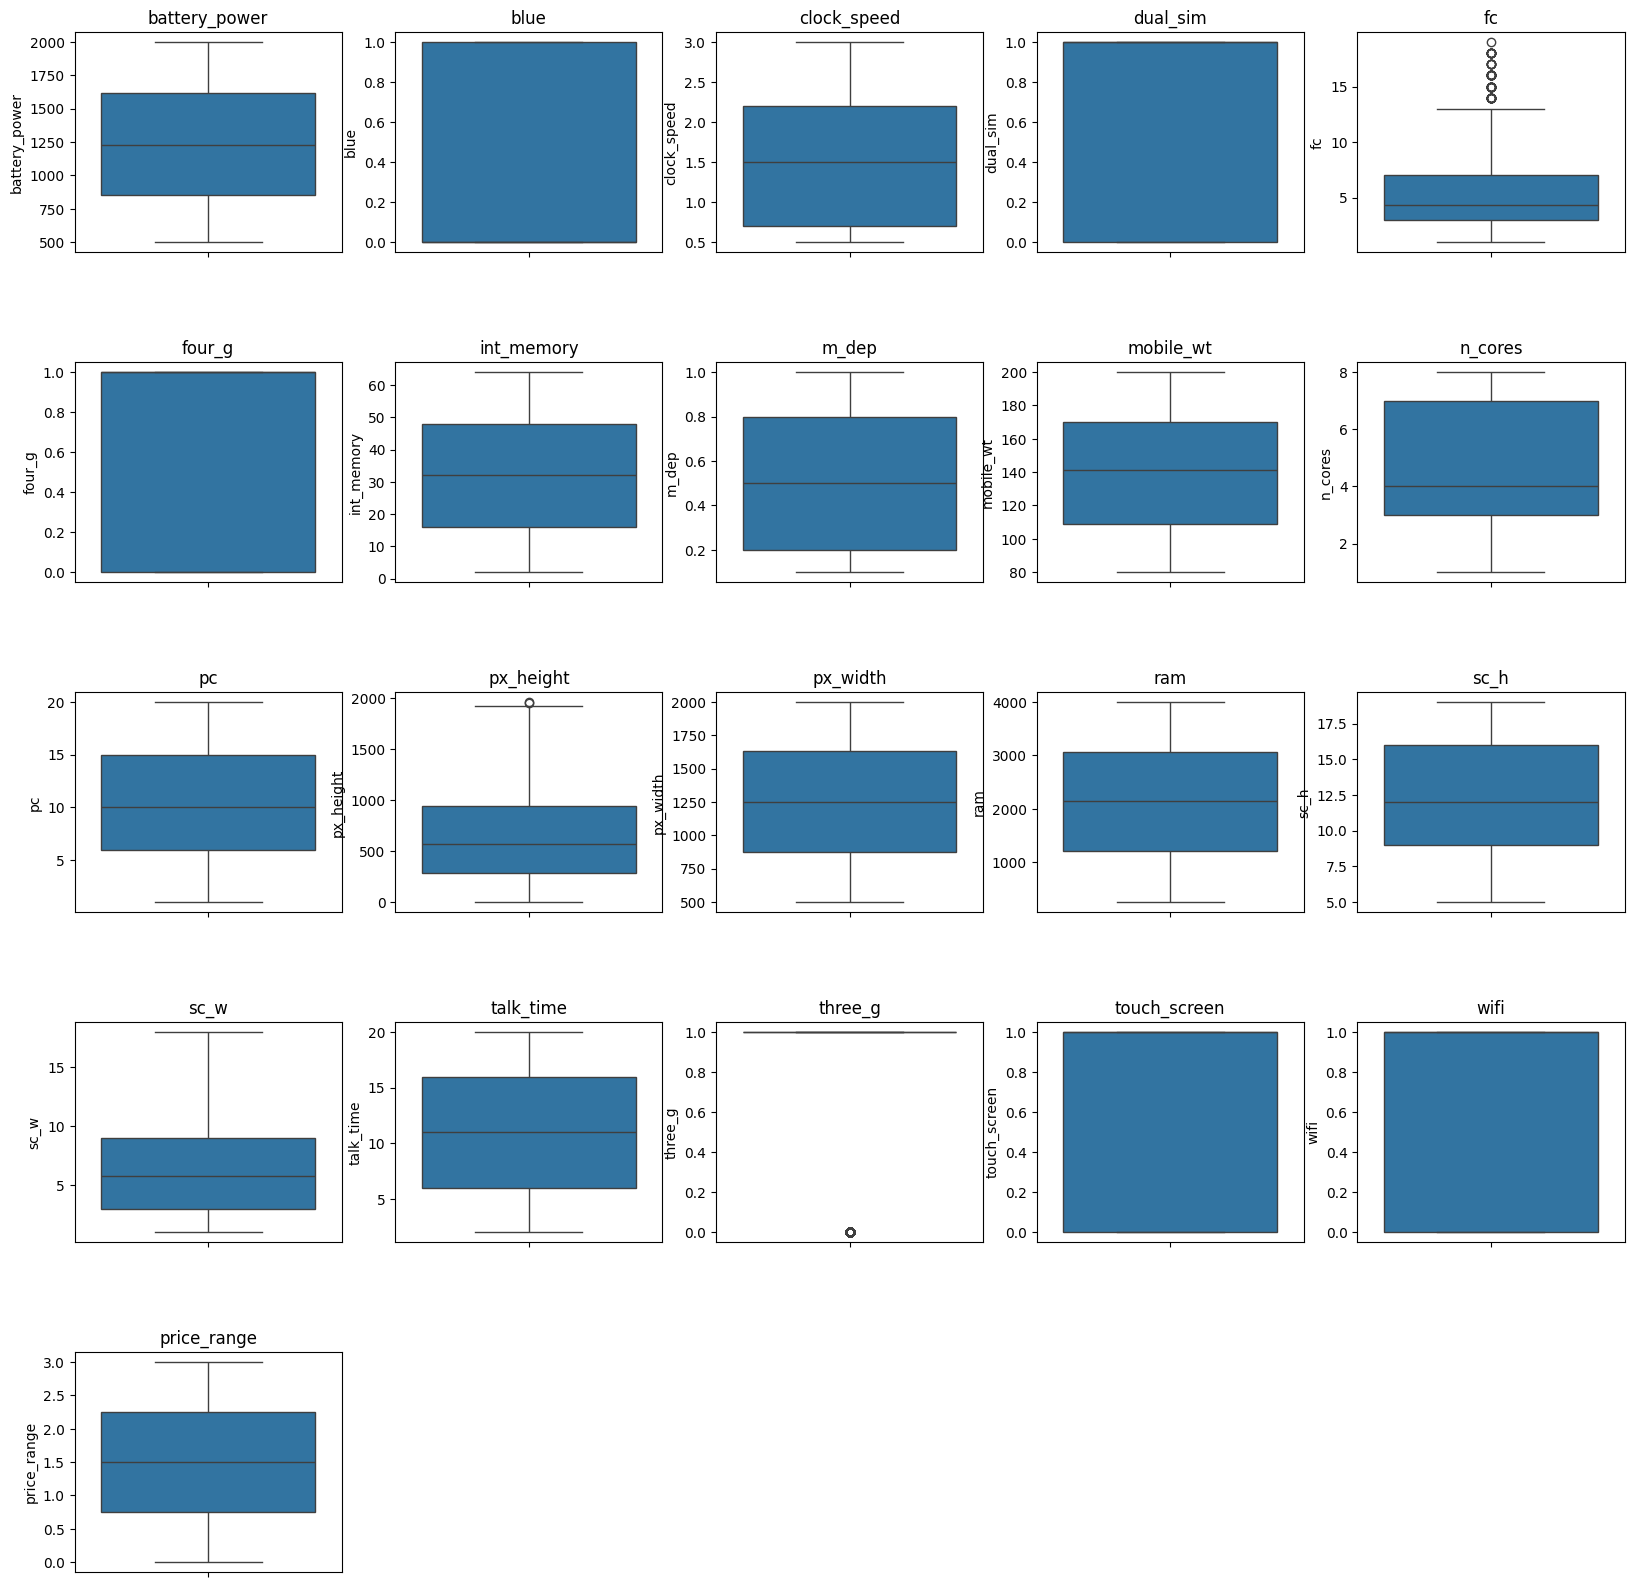

In [ ]:
# Set the figure size.
plt.figure(figsize=(20,20))

# Loop through each coloumn in the dataframe.
for index,item in enumerate(df.describe().columns.to_list()):

  # Create a subplot in 5x5 grid.
  plt.subplot(5,5,index+1)

  # Create a box plot for a given column.
  sns.boxplot(df[item])

  # Add the column name as the subplot title.
  plt.title(item)

  # Add some spacing between the subplots.
  plt.subplots_adjust(hspace=0.5)



*   There are no outliers in our dataset.



## Analyze numerical variables (Distplots)

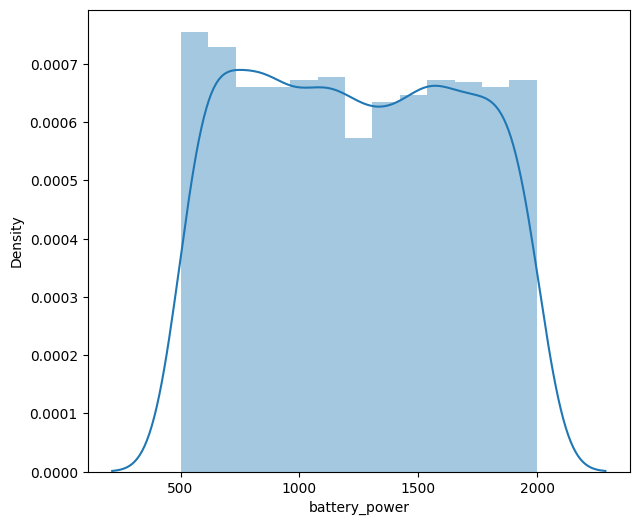

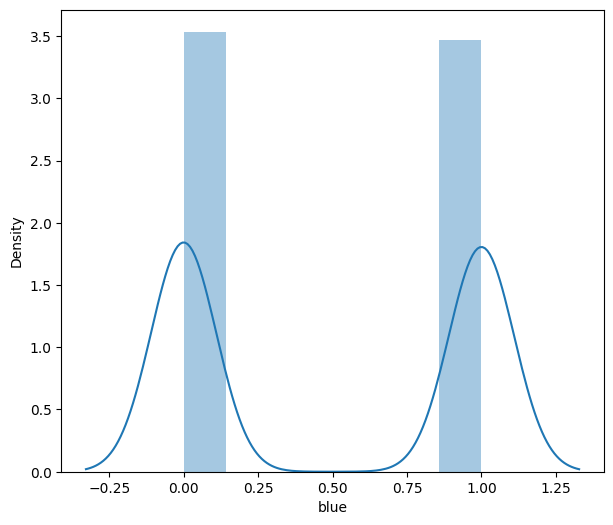

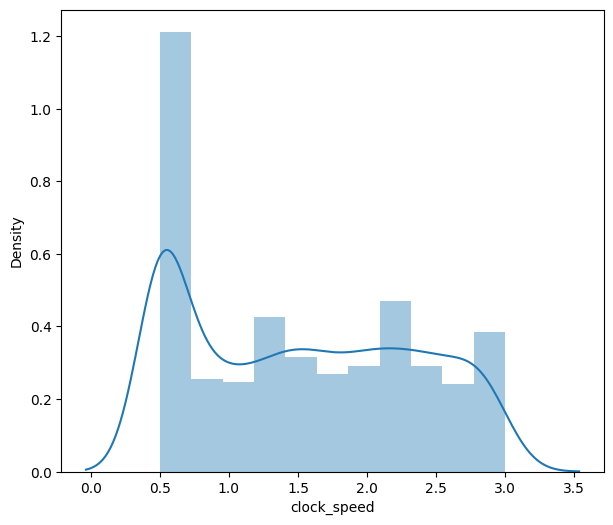

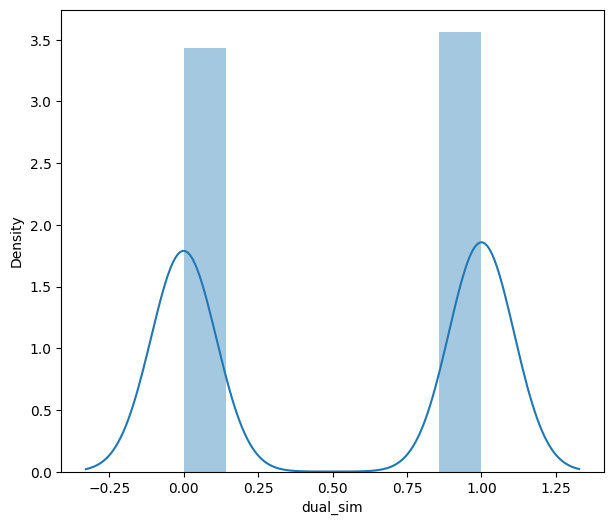

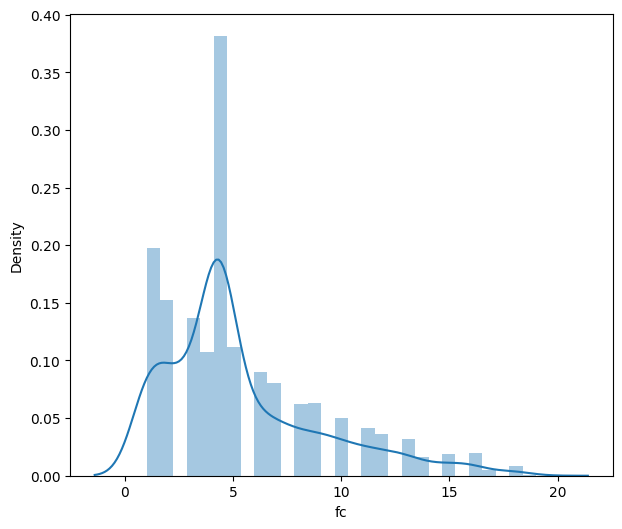

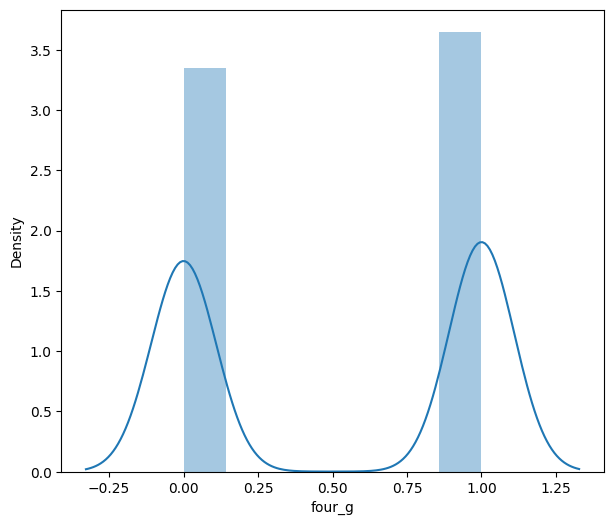

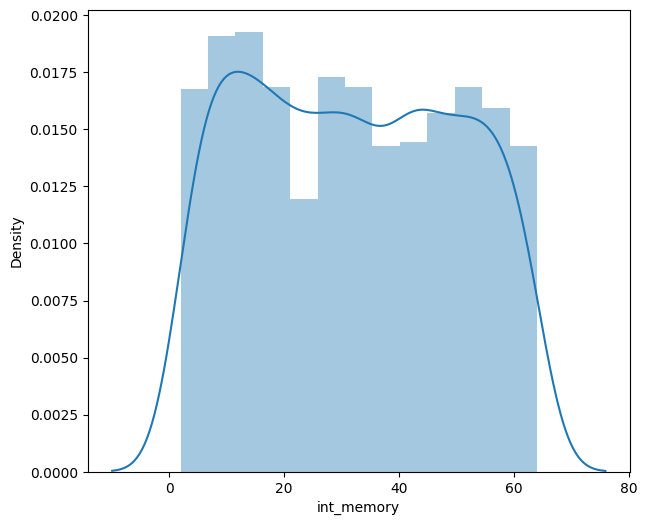

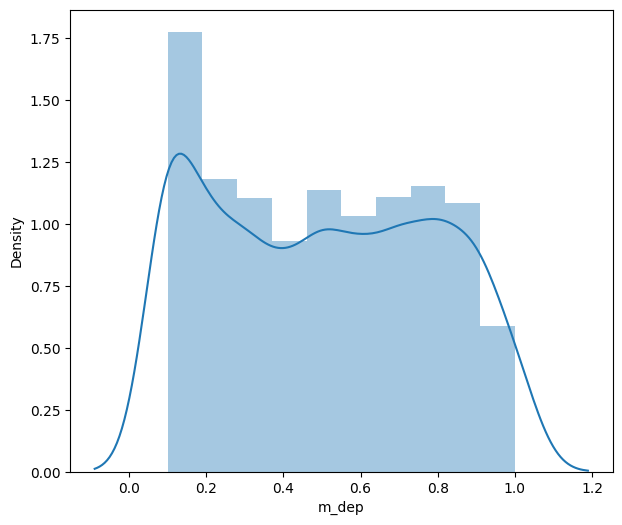

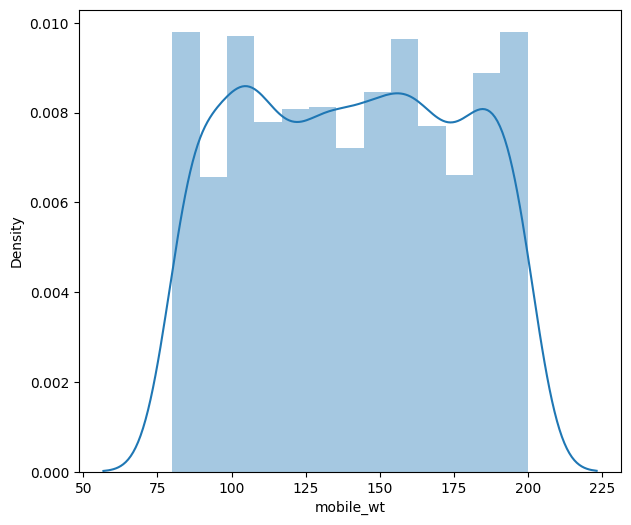

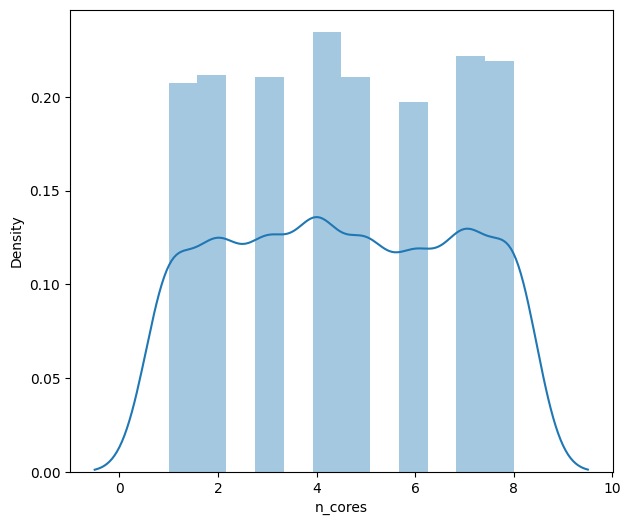

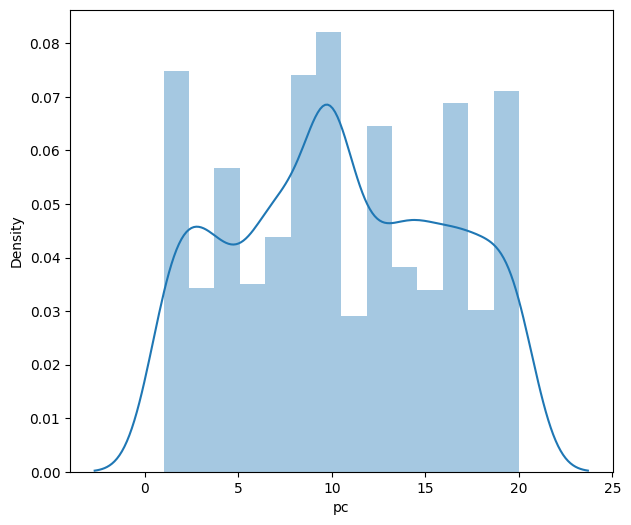

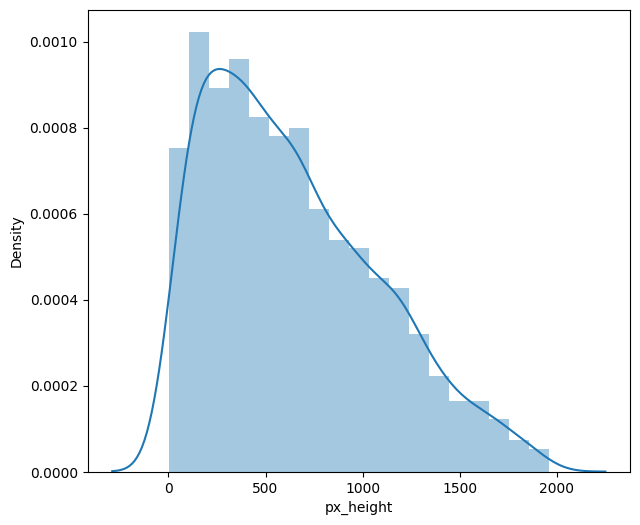

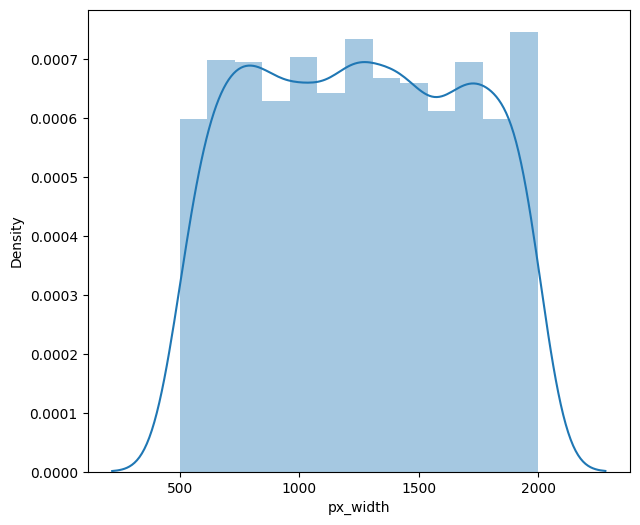

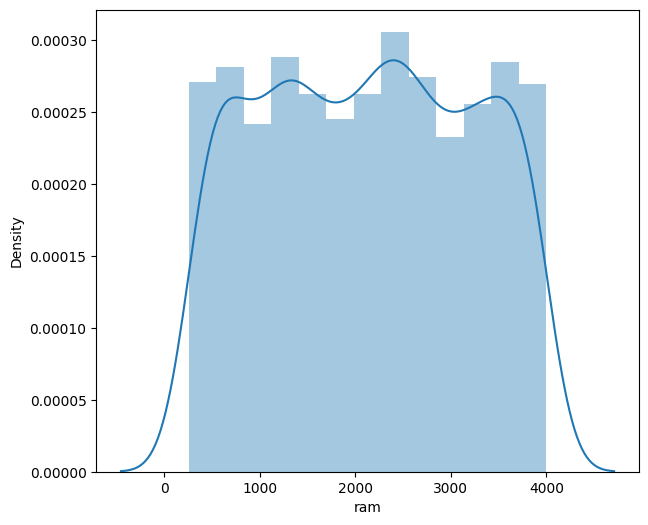

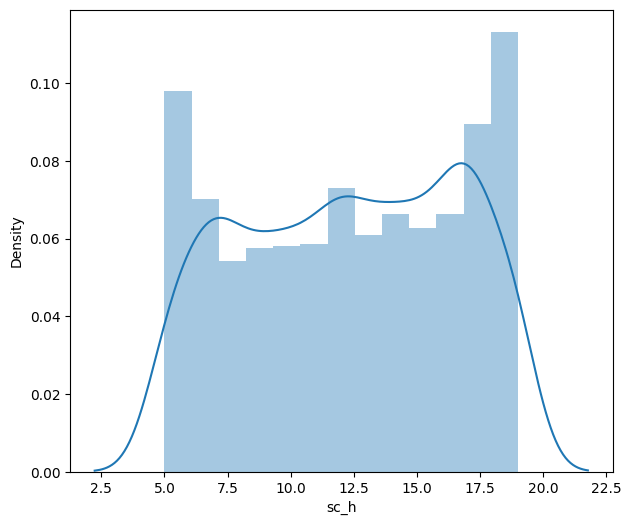

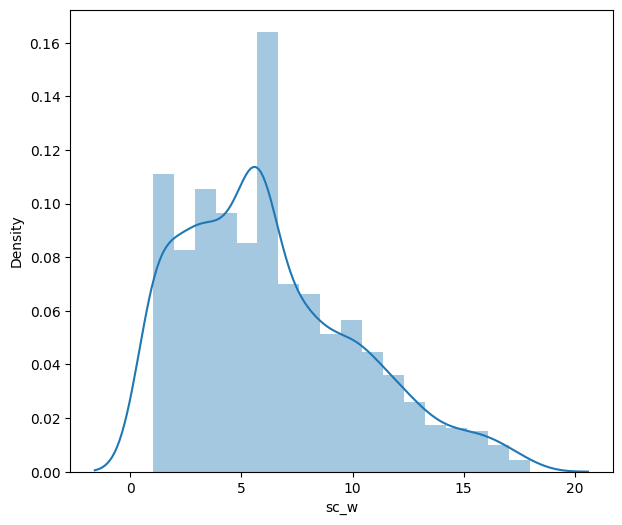

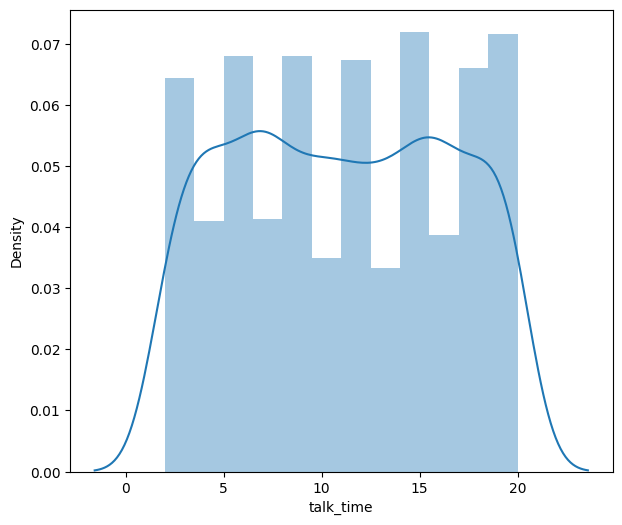

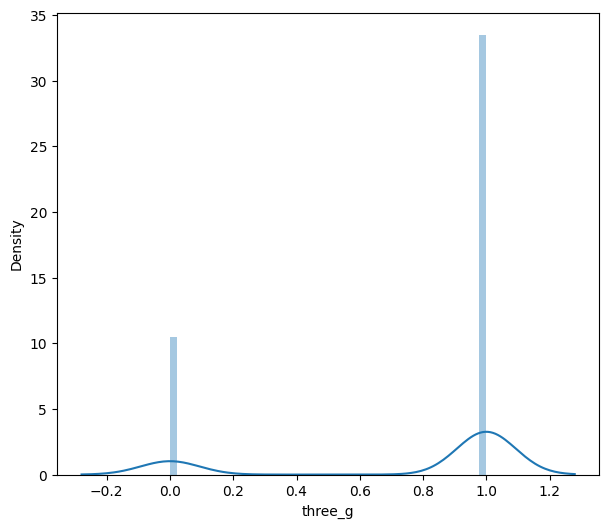

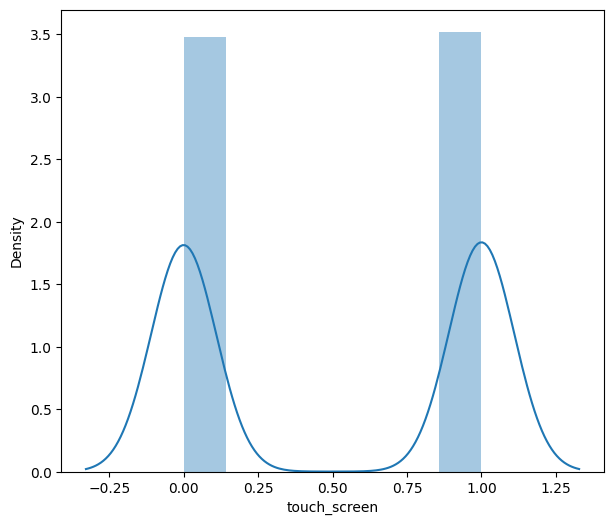

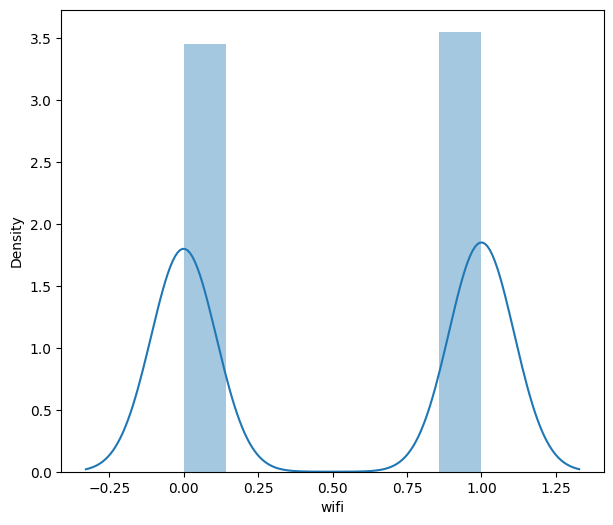

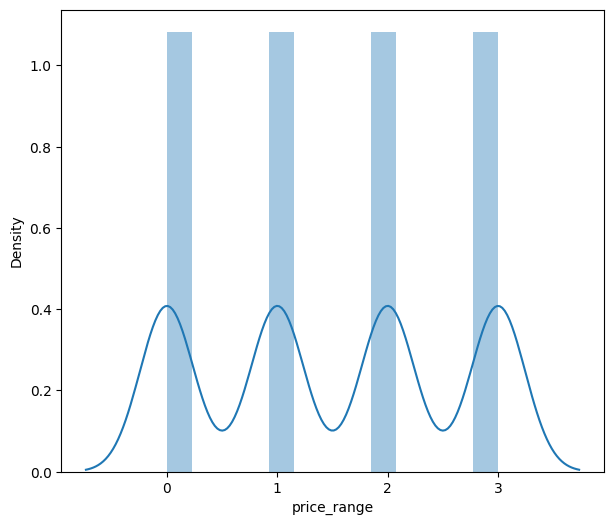

In [ ]:
# Making a list of all the numerical columns.
numerical_columns = list(df.select_dtypes(include = 'number').columns)

# Printing distplots to analyze the distribution of all numerical features.
for col in numerical_columns:
    plt.figure(figsize=(7,6))
    sns.distplot(x=df[col])
    plt.xlabel(col)

plt.show()

## Checking linearity

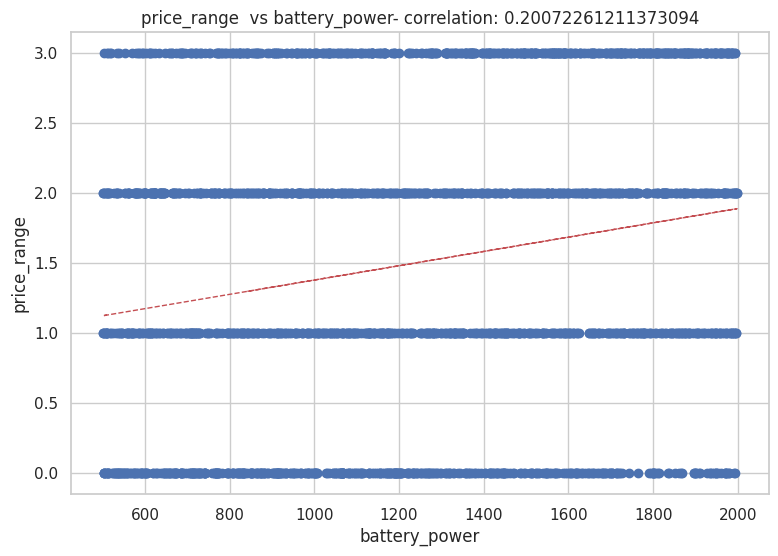

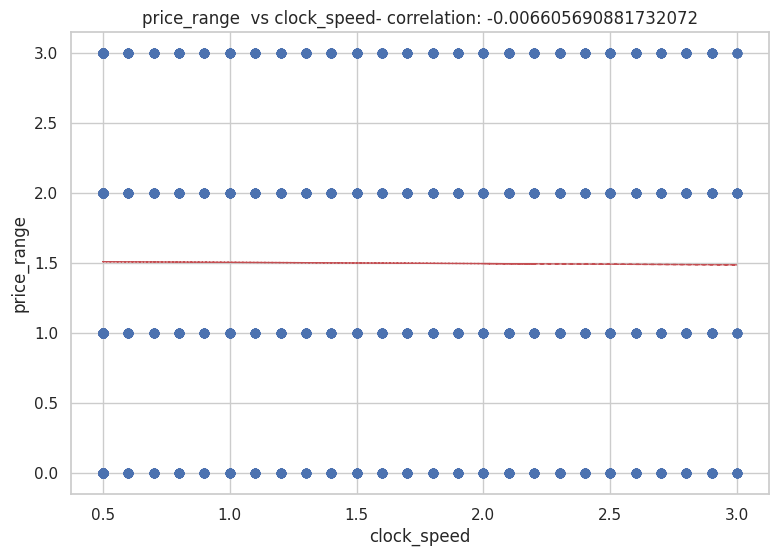

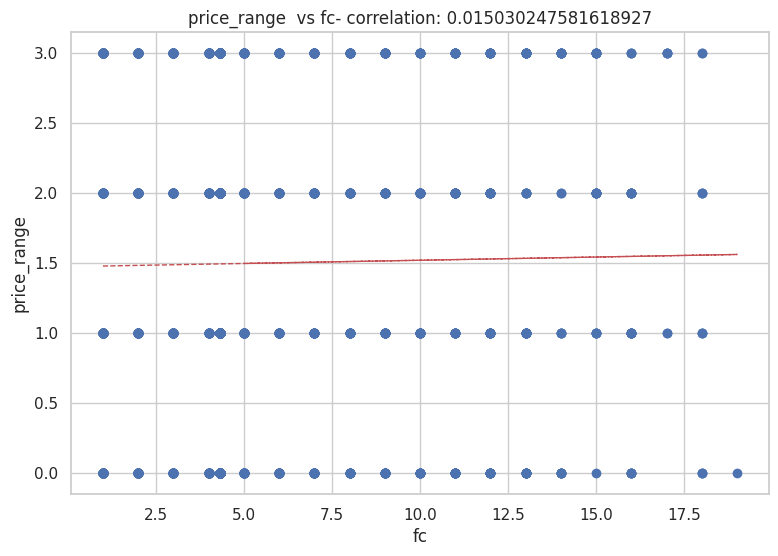

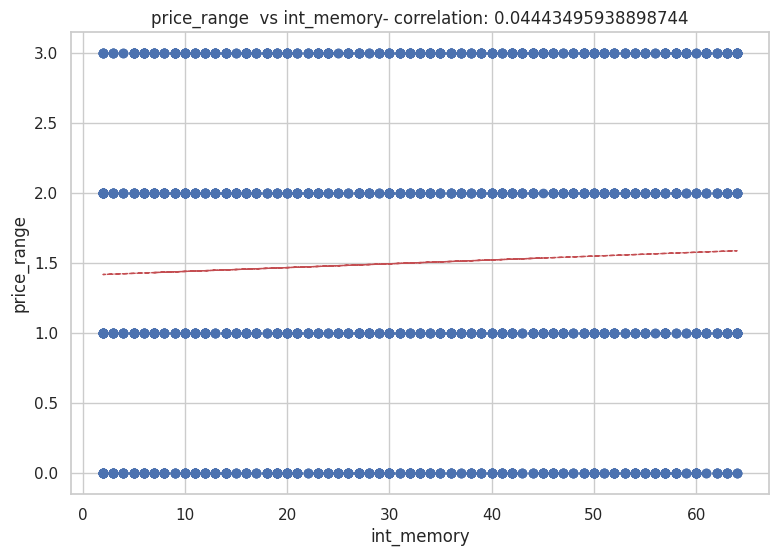

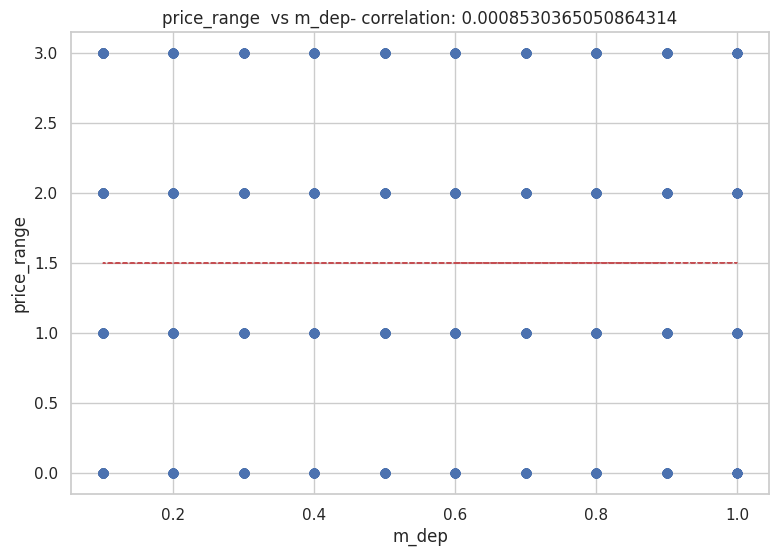

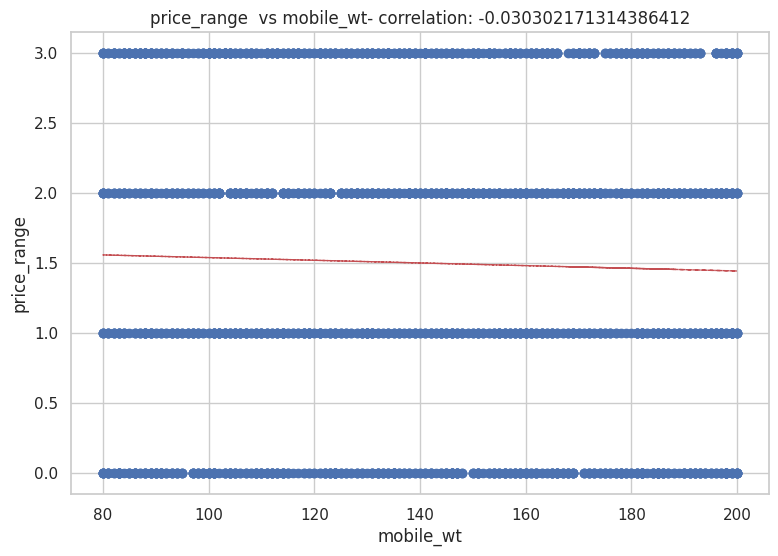

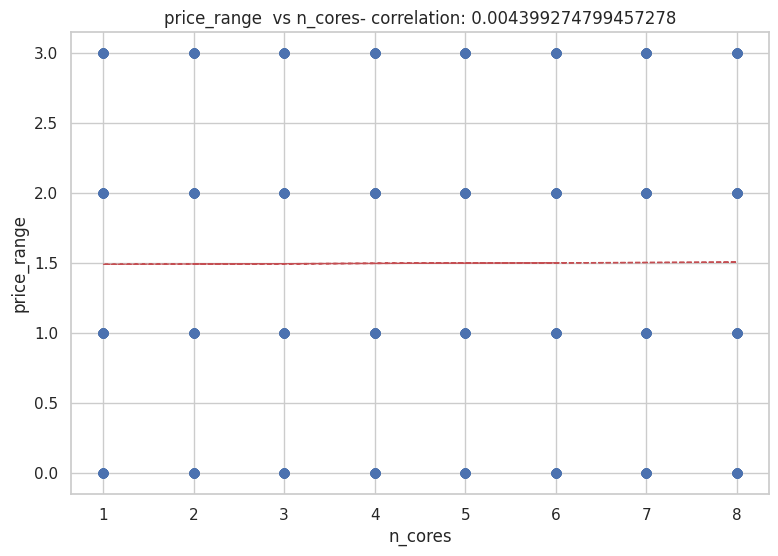

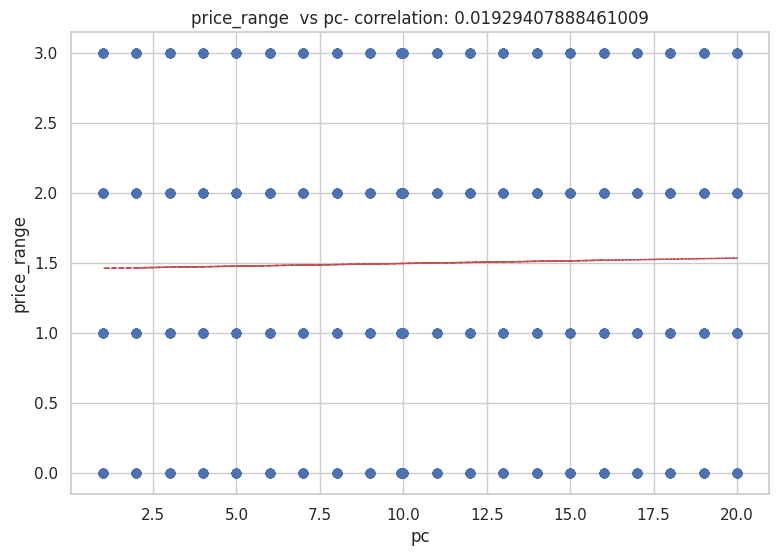

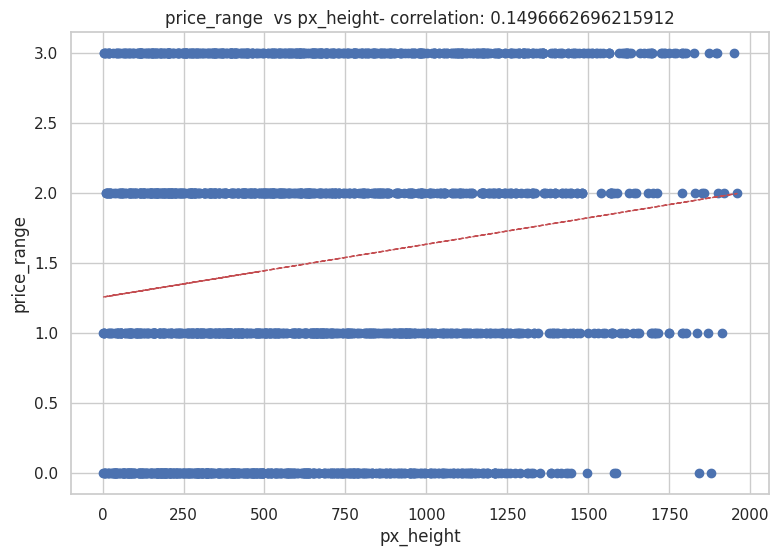

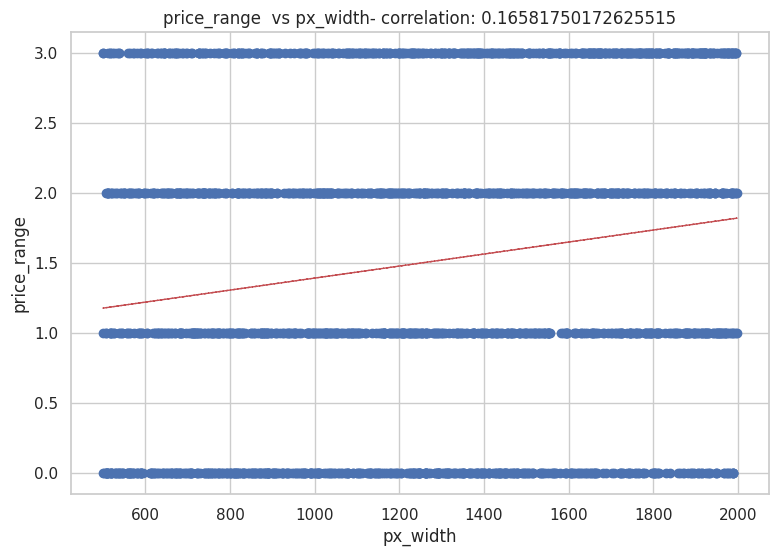

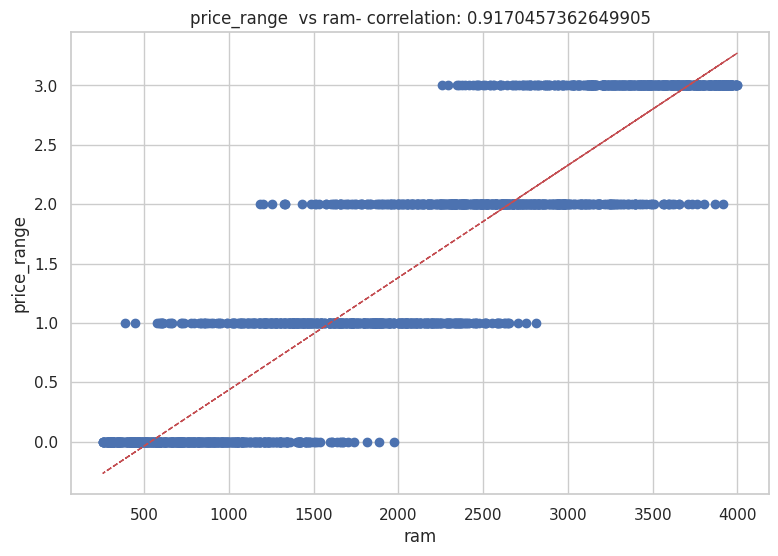

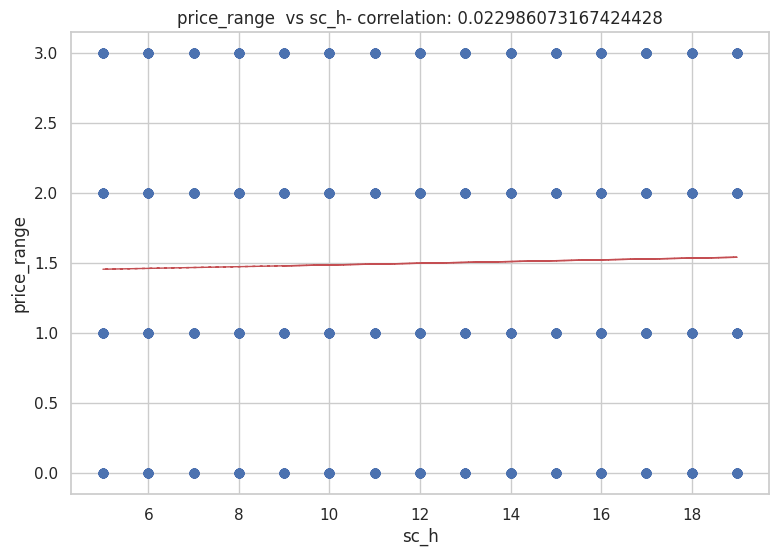

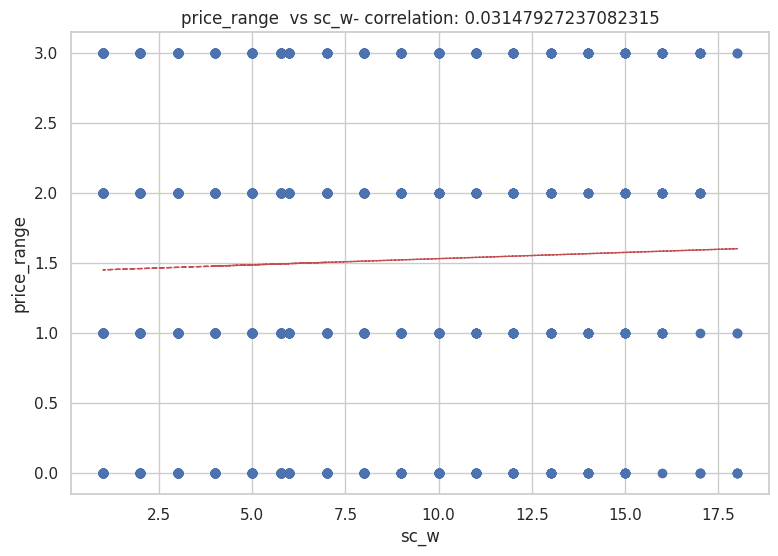

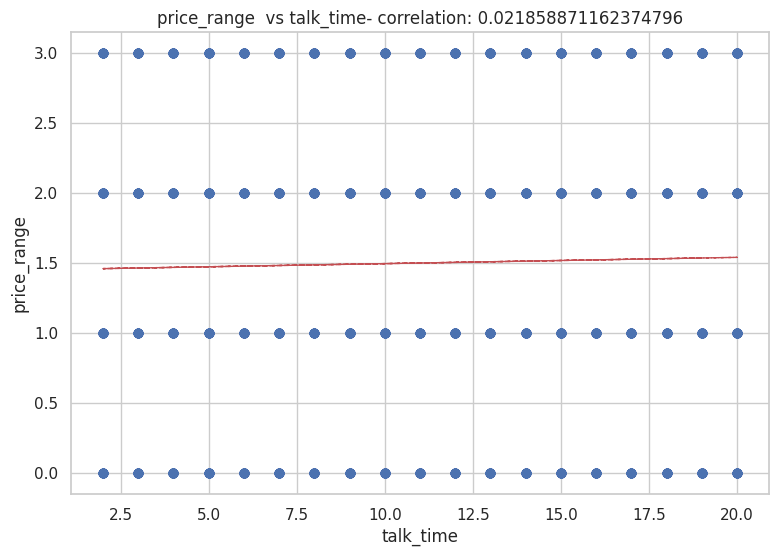

In [ ]:
# list of Non_categorical variables.
Features = ['price_range','battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']

# Checking the correlation of independent_variable(x) with the dependent_variable(y)
for col in Features[1:] :
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['price_range']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('price_range')
    ax.set_title('price_range  vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['price_range'],1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

## Checking Multicollinearity.

<Axes: >

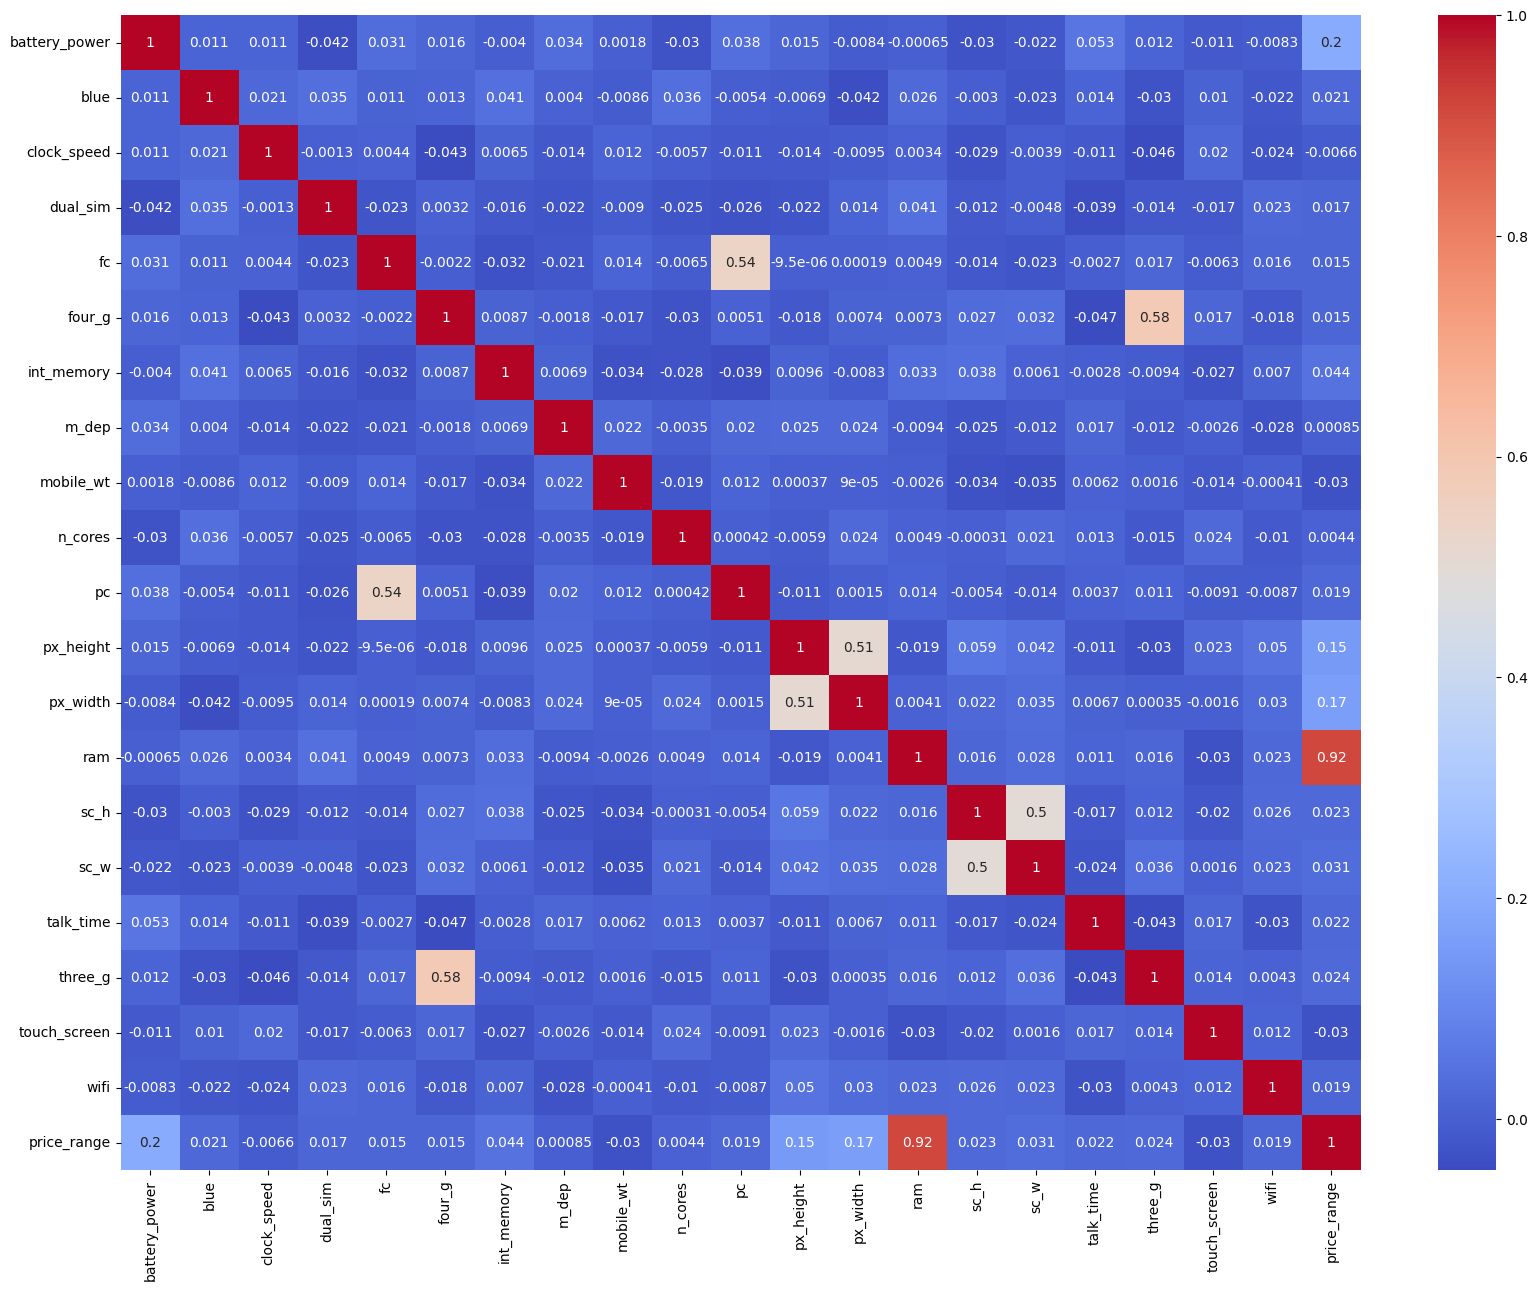

In [ ]:
# Creating heat map to see correlation among features.
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

###Observations



*   RAM has strong positive correlation with the price_range . Mobiles with high RAM are very costly.

*   Battery_power also has positive correlation with the price_range .Generally mobiles having high prices comes with good battery power.
* three_g and four_g are highly positively correlated . Nowdays most of the smartphones has both kind of options.This could be the reason that they are correlated.
* Primary camera (pc) and front camera (fc) are positively correlated.



In [ ]:
# Creating a new column named screen_size.
df['screen_size'] = df['sc_h']*df['sc_w']

# Dropping sc_h and sc_w from the dataframe.
df.drop(['sc_h','sc_w'], axis=1,inplace = True)

# Creating a new column named px_size.
df['px_size'] = df['px_height']*df['px_width']

# Dropping px_height and px_width from the dataframe.
df.drop(['px_height','px_width'], axis=1,inplace = True)

# Dropping unnecessary features that have almost zero correlation with the target variable.
df.drop(['m_dep','n_cores','clock_speed'],axis=1,inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   dual_sim       2000 non-null   int64  
 3   fc             2000 non-null   float64
 4   four_g         2000 non-null   int64  
 5   int_memory     2000 non-null   int64  
 6   mobile_wt      2000 non-null   int64  
 7   pc             2000 non-null   float64
 8   ram            2000 non-null   int64  
 9   talk_time      2000 non-null   int64  
 10  three_g        2000 non-null   int64  
 11  touch_screen   2000 non-null   int64  
 12  wifi           2000 non-null   int64  
 13  price_range    2000 non-null   int64  
 14  screen_size    2000 non-null   float64
 15  px_size        2000 non-null   float64
dtypes: float64(4), int64(12)
memory usage: 250.1 KB


## Split data for training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('price_range',axis=1)
Y = df['price_range']

X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=2023)

print('shape of x_train :',X_train.shape)
print('shape of y_train :',y_train.shape)
print('shape of x_test :',X_test.shape)
print('shape of y_test :',y_test.shape)

shape of x_train : (1600, 15)
shape of y_train : (1600,)
shape of x_test : (400, 15)
shape of y_test : (400,)


## Scaling

In [ ]:
# Importing standard scaler.
from sklearn.preprocessing import StandardScaler

In [ ]:
#Standardizing dataset after splitting them.
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)



## Training multiple models.

In [ ]:
# Importing multiple models.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier




In [ ]:
# Importing evaluation metrics.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Model 1 - Logistic regression

In [ ]:
# Training logistic regression model.
logreg = LogisticRegression().fit(X_train, y_train)

# Predicting values for test and train data.
y_pred_test_log = logreg.predict(X_test)
y_pred_train_log = logreg.predict(X_train)

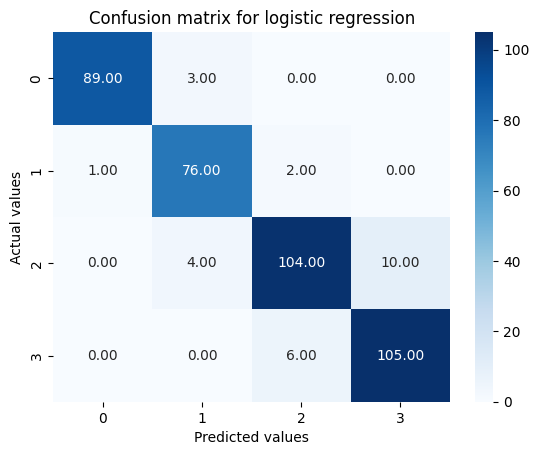

In [ ]:
# Generating confusion matrix for logistic regression.
cf_matrix_log = confusion_matrix(y_test,y_pred_test_log)

# Creating a heat map for confusion matrix.
ax = sns.heatmap(cf_matrix_log,annot=True,cmap='Blues',fmt=".2f")

# Setting x_y labels and title.
ax.set_title('Confusion matrix for logistic regression')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')

# Tick labels.
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

# Show the confusion matrix.
plt.show()

In [ ]:
# Printing classification report for logistic regression.
print(classification_report(y_test,y_pred_test_log))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        92
           1       0.92      0.96      0.94        79
           2       0.93      0.88      0.90       118
           3       0.91      0.95      0.93       111

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.93       400



### Model 2 - KNeighborsClassifier

In [ ]:
# Training KNN model.
KNN = KNeighborsClassifier().fit(X_train, y_train)

# Predicting values for test and train data.
y_pred_test_knn = KNN.predict(X_test)
y_pred_train_knn = KNN.predict(X_train)

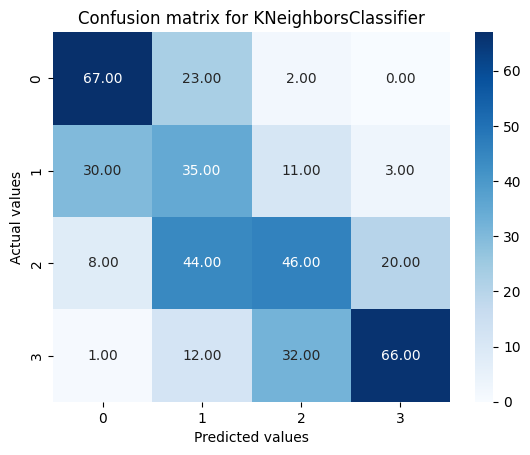

In [ ]:
# Generating confusion matrix for KNeighborsClassifier.
cf_matrix_knn = confusion_matrix(y_test,y_pred_test_knn)

# Creating a heat map for confusion matrix.
ax = sns.heatmap(cf_matrix_knn,annot=True,cmap='Blues',fmt=".2f")

# Setting x_y labels and title.
ax.set_title('Confusion matrix for KNeighborsClassifier')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')

# Tick labels.
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

# Show the confusion matrix.
plt.show()

In [ ]:
# Printing classification report for KNeighborsClassifier .
print(classification_report(y_test,y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.63      0.73      0.68        92
           1       0.31      0.44      0.36        79
           2       0.51      0.39      0.44       118
           3       0.74      0.59      0.66       111

    accuracy                           0.54       400
   macro avg       0.55      0.54      0.53       400
weighted avg       0.56      0.54      0.54       400



### Model 3 - DecisionTreeClassifier

In [ ]:
# Training decision_tree model.
DecisionTree = DecisionTreeClassifier().fit(X_train, y_train)

# Predicting values for test and train data.
y_pred_test_dt = DecisionTree.predict(X_test)
y_pred_train_dt = DecisionTree.predict(X_train)

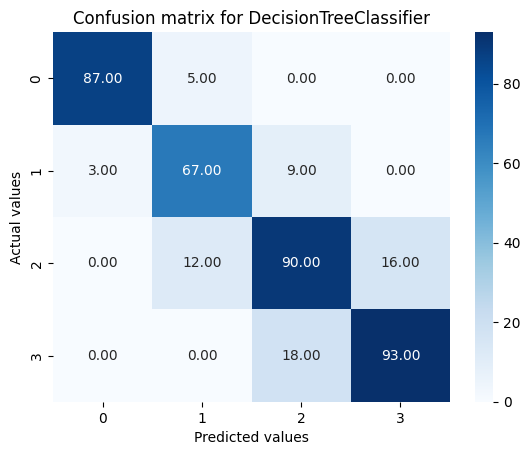

In [ ]:
# Generating confusion matrix for DecisionTreeClassifier .
cf_matrix_dt = confusion_matrix(y_test,y_pred_test_dt)

# Creating a heat map for confusion matrix.
ax = sns.heatmap(cf_matrix_dt,annot=True,cmap='Blues',fmt=".2f")

# Setting x_y labels and title.
ax.set_title('Confusion matrix for DecisionTreeClassifier')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')

# Tick labels.
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

# Show the confusion matrix.
plt.show()

In [ ]:
# Printing classification report for DecisionTreeClassifier  .
print(classification_report(y_test,y_pred_test_dt))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        92
           1       0.80      0.85      0.82        79
           2       0.77      0.76      0.77       118
           3       0.85      0.84      0.85       111

    accuracy                           0.84       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.84      0.84      0.84       400



### Model 4 - RandomForestClassifier

In [ ]:
# Training random_forest model.
RandomForest = RandomForestClassifier().fit(X_train, y_train)

# Predicting values for test and train data.
y_pred_test_rf = RandomForest.predict(X_test)
y_pred_train_rf = RandomForest.predict(X_train)

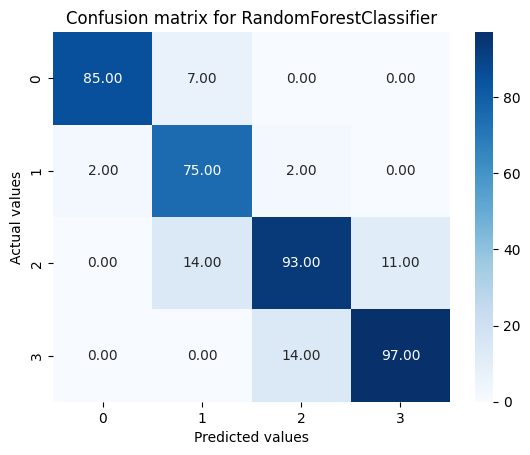

In [ ]:
# Generating confusion matrix for RandomForestClassifier .
cf_matrix_rf = confusion_matrix(y_test,y_pred_test_rf)

# Creating a heat map for confusion matrix.
ax = sns.heatmap(cf_matrix_rf,annot=True,cmap='Blues',fmt=".2f")

# Setting x_y labels and title.
ax.set_title('Confusion matrix for RandomForestClassifier')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')

# Tick labels.
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

# Show the confusion matrix.
plt.show()

In [ ]:
# Printing classification report for RandomForestClassifier  .
print(classification_report(y_test,y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        92
           1       0.84      0.96      0.89        79
           2       0.87      0.82      0.84       118
           3       0.91      0.88      0.89       111

    accuracy                           0.90       400
   macro avg       0.90      0.91      0.90       400
weighted avg       0.90      0.90      0.90       400



### Model 5 - XGBClassifier

In [ ]:
# Training XGBoost model.
XGBoost = XGBClassifier().fit(X_train, y_train)

# Predicting values for test and train data.
y_pred_test_xg = XGBoost.predict(X_test)
y_pred_train_xg = XGBoost.predict(X_train)

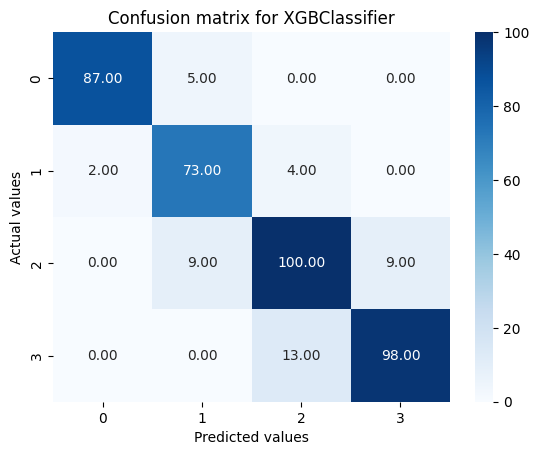

In [ ]:
# Generating confusion matrix for XGBClassifier .
cf_matrix_xg = confusion_matrix(y_test,y_pred_test_xg)

# Creating a heat map for confusion matrix.
ax = sns.heatmap(cf_matrix_xg,annot=True,cmap='Blues',fmt=".2f")

# Setting x_y labels and title.
ax.set_title('Confusion matrix for XGBClassifier')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')

# Tick labels.
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

# Show the confusion matrix.
plt.show()

In [ ]:
# Printing classification report for XGBClassifier .
print(classification_report(y_test,y_pred_test_xg))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        92
           1       0.84      0.92      0.88        79
           2       0.85      0.85      0.85       118
           3       0.92      0.88      0.90       111

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



###Observations :

*   Out of the five models trained till now logistic regression and XGBoostclassifier are having the highest accuracy.
*   We will do hyperparameter tuning for logistic regression and XGBoostclassifier , then pick the best model for deployement.



## Hyperparameter Tuning for Logistic regression.

In [ ]:
# Creating an instance of logistic regression.
logmodel = LogisticRegression()

In [ ]:
# Creating a parameter grid.
param_grid = {'penalty' : ['l1','l2','elasticnet','none'],
               'C' : np.logspace(-4,4,20),
               'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
               'max_iter' : [100,1000,2500,5000],
               }

In [ ]:
# importing GridsearchCV.
from sklearn.model_selection import GridSearchCV

In [ ]:
# Initiating GridSearchCV.
clf = GridSearchCV(logmodel, param_grid = param_grid, cv=3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [ ]:
# Printing the best parameters.
best_clf.best_estimator_

LogisticRegression(C=1.623776739188721, max_iter=1000, penalty='l1',
                   solver='saga')

In [ ]:
# Testing accuracy of Hypertuned logistic regression.
print(f'Accuracy : {best_clf.score(X_test, y_test):.3f} ')

Accuracy : 0.973 


## Hyperparameter Tuning for XGBClassifier.

In [ ]:
# Creating an instance of XGBClassifier.
XGB = XGBClassifier()

In [ ]:
# Creating a parameter grid.
param = {'learning_rate': [0.001,0.01,0.1,0.25,0.5,0.4],
               'max_depth': [1,2,3,4,5,6],
               'max_features': [1,2,3,4,5,6],
               'n_estimators': [20,40,50,70,100]
               }

In [ ]:
# Initiating GridSearchCV.
clf = GridSearchCV(XGB, param_grid = param, cv=3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


In [ ]:
# Printing the best parameters.
best_clf.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_features=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# Testing accuracy of Hypertuned XGBoost classifier.
print(f'Accuracy : {best_clf.score(X_test, y_test):.3f} ')

Accuracy : 0.902 


###Observation :
* Accuracy scores of logistic regression and XGBoost classifier after hyperparameter tuning are 0.973 and 0.902.

* We have found logistic regression as the best fit model for our data with the highest accuracy of 0.973.

## Checking Feature importance

### Checking feature importance of logistic regression

In [ ]:
# Creating a function to fetch feature importance.
def get_feature_importance(clf,feature_names):
  feature_importance = (
      pd.DataFrame(
          {
               'variable': feature_names, # Feature names
               'coefficient': clf.coef_[0] # Feature coefficients
          }
      ).round(decimals=2)\
       .sort_values('coefficient', ascending=False)\
       .style.bar(color=['red', 'green'], align='zero')
  )
  return feature_importance

In [ ]:
get_feature_importance(logreg,X.columns)

,variable,coefficient
6,mobile_wt,0.350000
14,wifi,0.140000
2,dual_sim,0.080000
4,four_g,0.060000
7,pc,0.050000
1,blue,0.040000
13,touch_screen,0.030000
12,three_g,-0.060000
11,talk_time,-0.070000
3,fc,-0.090000


### Checking feature importance of XGBClassifier

<BarContainer object of 16 artists>

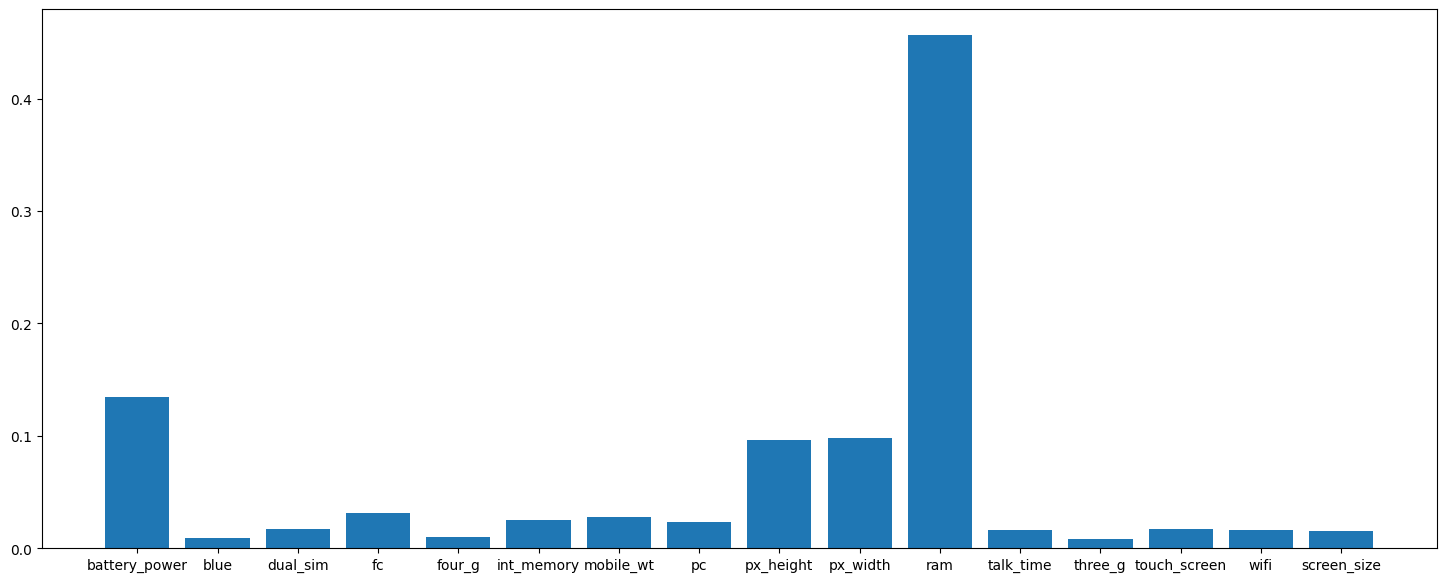

In [ ]:
# Creating a bar graph.
plt.figure(figsize=(18,7))
plt.bar(X.columns,XGBoost.feature_importances_ )

## Conclusion

* During our analysis, we conducted an initial exploratory data analysis and visualisation.We analysed our dependent variable 'price_range' with respect to various independent variables like Battery_power,RAM,Internal Memory,front camera,primary camera,px_height,px_width etc. We then checked the distribution of the numerical variables.

* We also checked the multicollinearity and created some new features using the existing ones, also removed unnecessary features.


* We employed 5 different machine learning algorithms including :

  1.Logistic regression

  2.KNeighborsClassifier

  3.DecisionTreeClassifier

  4.RandomForestClassifier

  5.XGBClassifier

* We did hyperparameter tuning for Logistic regression  and XGBClassifier.

* Found Logistic regression as the best model with very high prediction accuracy on both training  and testing dataset.
* Then we checked feature importance for logistic regression and XGBClassifier ,found RAM as the most important feature ,Battry power as the second most important feature.